<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Исследование объявлений о продаже квартир

Рассматриваются данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры, которые наибольшим образом влияют на рыночную стоимость. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении


## Изучение данных из файла

Импортируем необходимые библиотеки:

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
sns.set()

Выведем первые пять строк датасета:

In [69]:
data = pd.read_csv("project3.csv")
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные в таблице разделены табуляцией, а не запятой, прочитаем данные заного, учитывая этот факт:

In [70]:
data = pd.read_csv("real_estate_data.csv", sep = "\t")
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Рассмотрим информацию о таблице:

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Значения в некоторых столбцах таблицы отсутствуют. Столбцы `ceiling_height`, `living_area`, `kitchen_area`, `floors_total` являются важными для исследования, поэтому их нобходимо аккуратно заполнить, не меняя при этом распределения значений в этом стобце. Значения в этих столбцах могут отсутствовать из-за сбоев в работе сервиса или потому что человек, сделавший объявление, по ошибке не указал эти данные. Один из вариантов - заполнить пропуски средним или медианным значением, однако это может быть сильно повлиять на распределение в отдельных поселках, ведь в различных поселках могут быть различные типовые застройки. Поэтому ещё один способ заполнения - заполнить пропуски основываясь на медианном значении для данного поселка. Проблемы могут возникнуть с маленькими посселками, в которых мало объявлений, такие поселки можно объединять в одну группу при заполнении. Выбрано медианное значение, а не среднее, поскольку оно устойчиво к выбросам в данных. Одинм из возможных способов заполнения данных в вышеуказанных столбцах могло быть заполнение основанное на значениях столбца `last_price`, однако конечной целью исследование является выделение параметров для предсказания значений этого столбца, поэтому такое заполнение могло бы привести к ложным выводом относительно зависимости параметров.


В столбцах `is_apartment`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` пропуски кажутся вполне логичными. Действительно, пропуск в этих столбцах ввесьма вероятно означает отсутствие вблизи жилого помещения указанных локаций. Поэтому в булевых столбцах отсутствующие значения можно заменить на `False`. С числовыми столбцами дела обстоят сложнее, поскольку сложно подобрать какую-либо адекватную замену проаускам. Один из возможных вариантов - оставить в этих столбцах значение `NaN` и при дальнейшем анализе, при необходимости, отсекать эти значения или наоборот отдельно обрабатывать, покскольку отсутствующее значение также может нести в себе полезную информацию.


Значения в столбце `locality_name` сложно пытаться предугадать, поэтому одно из возможных решений - замена пропущенных значений на `Неизвестно`. Значения в этих столбцах могуть быть пропущены из-за проблем с определением местоположения в сервисе или из-за того, что продавец намеренно решил скрыть неблагоприятное место, чтобы не отпугивать потенциальных клиентов.


Пропуски в столбце `days_exposition` скорее всего означают то, что объявление не было закрыто на момент составления датасета. Можно заполнить эти пропуски разницей между сегодняшней датой и датой выставления объявления (значения этого столбца присутствуют во всех строках), но, поскольку набор данных довольно старый, это может негативно сказаться на качестве анализа. Поэтому более уместно будет оставить в этих строках пропуски.


Для удобства также следует заменить тип данных столбцов `floors_total`, `parks_around3000`, `ponds_around3000`, `balcony` следует заменить на целочисленный. Тип данных столбцов `is_apartment` - на `bool`. Столбец `first_day_exposition` - на `datetime`. 

Проверим набор данных на наличие дубликатов:

In [72]:
data.duplicated().sum()

0

Дублирующихся данных нет.

Проверим некоторые столбец `locality_name` на налицие неявных дуликатов:

In [73]:
data["locality_name"].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Можно заметить, что очень много неявных буликатов появилось из-за разного написания слова "посёлок". В процессе предобработк необходтио будет привести эти названия к единому виду.

## Предобработка данных

Поскольку значения столбца `locality_name` будут использоваться при заполнении пропущенных значений в некоторых столбцах, избавимся от неявных дубликатов в нем, предварительно заполнив пропуки:

In [74]:
data["locality_name"] = data["locality_name"].fillna("Неизвестно")

In [75]:
def to_one_name(name):
    name = name.replace("ё", "е")
    return name


data["locality_name"] = data["locality_name"].apply(to_one_name)

Проверим результат:

In [76]:
data["locality_name"].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Функция сработала коректна.

Заполним пропуски столбцов `balcony`, `parks_around3000`, `ponds_around3000`:

In [77]:
data[["balcony", "parks_around3000", "ponds_around3000"]] = data[["balcony", "parks_around3000", "ponds_around3000"]].fillna(0.0)

Проверим результат дополнения:

In [78]:
data[["balcony", "parks_around3000", "ponds_around3000"]].isna().sum()

balcony             0
parks_around3000    0
ponds_around3000    0
dtype: int64

Заполним данные в столбцe `is_apartment`:

In [79]:
data["is_apartment"] = data["is_apartment"].fillna(False)

Выполним проверку:

In [80]:
data["is_apartment"].isna().sum()

0

Перед заполнением пропусков в столбцах `ceiling_height`, `living_area`, `kitchen_area`, `floors_total`, рассмотрим проанализируем столбец `locality_name` (хотим заполнить данные основываясь на значении этого столбца)

Рассмотрим количество локаций, встречавшихся меньше 50 раз (без учета строк с пропусками):

In [81]:
data_no_nan = data.dropna(subset= ["ceiling_height", "living_area", "kitchen_area", "floors_total"])
print(len(data["locality_name"].value_counts()), "- количество локаций с учетом пропусков")
print(len(data_no_nan["locality_name"].value_counts()), "- количесвто локаций, если выбросить пропуски")
print((data_no_nan["locality_name"].value_counts() < 50).sum(), "- количесвто локаций, встречающихся меньше 50 раз")

331 - количество локаций с учетом пропусков
252 - количесвто локаций, если выбросить пропуски
229 - количесвто локаций, встречающихся меньше 50 раз


Как видно, очень во многих локациях совсем нет нужных данных. Также многие места встречаются крайне редко, поэтому заполнение данных на основании этих значений было бы не до конца корректно. На основании этого, лучше заполнить пропущенные значения маленьких поселков медианным по всем поселкам значением, а тех, количесвто вхождений которых превышает 50 медианным значениям по срезу. Создадим столбец, указывающий на то, принадлежит днная локация к маленькому поселку или к оному из больших

In [82]:
value_counter =  data_no_nan["locality_name"].value_counts()
def is_little(name):
    if name not in value_counter or value_counter[name] <= 50:
        return "Маленький поселок"
    else:
        return name

data_fill_values = data.copy()
data_fill_values["is_little"] = data_fill_values["locality_name"].apply(is_little)
data_fill_values["is_little"].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'Маленький поселок',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'Гатчина', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'Всеволожск', 'Волхов', 'Сестрорецк',
       'Красное Село', 'Кудрово', 'Кириши', 'Тосно'], dtype=object)

Заполним пропуски в новой таблице используя описанный выше способ и сравним исходные распределения данных с новыми:

Для этого создадим вспомогательную сводную таблицу.

In [83]:
median_info = data_fill_values.pivot_table(index = "is_little",  values = ["ceiling_height", "living_area", "kitchen_area", "floors_total"], aggfunc = "median")
median_info

,ceiling_height,floors_total,kitchen_area,living_area
is_little,,,,
Волхов,2.58,5.0,6.80,30.300
Всеволожск,2.70,9.0,10.00,30.000
Выборг,2.55,5.0,8.00,30.000
Гатчина,2.55,5.0,8.05,29.000
Кириши,2.50,5.0,6.60,29.000
Кировск,2.50,5.0,7.50,29.400
Колпино,2.50,9.0,7.90,29.950
Коммунар,2.56,5.0,8.35,28.700
Красное Село,2.60,6.0,7.00,29.000


Далее напишем функцию, заполнябщую данные и применим её:

In [84]:
def fill_nan(row):
    if math.isnan(row["ceiling_height"]):
        row["ceiling_height"] = median_info.loc[row["is_little"], "ceiling_height"]
    if math.isnan(row["living_area"]):
        row["living_area"] = median_info.loc[row["is_little"], "living_area"]
    if math.isnan(row["kitchen_area"]):
        row["kitchen_area"] = median_info.loc[row["is_little"], "kitchen_area"]
    if math.isnan(row["floors_total"]):
        row["floors_total"] = median_info.loc[row["is_little"], "floors_total"]
    return row

In [85]:
data_fill_values = data_fill_values.apply(fill_nan, axis = 1)

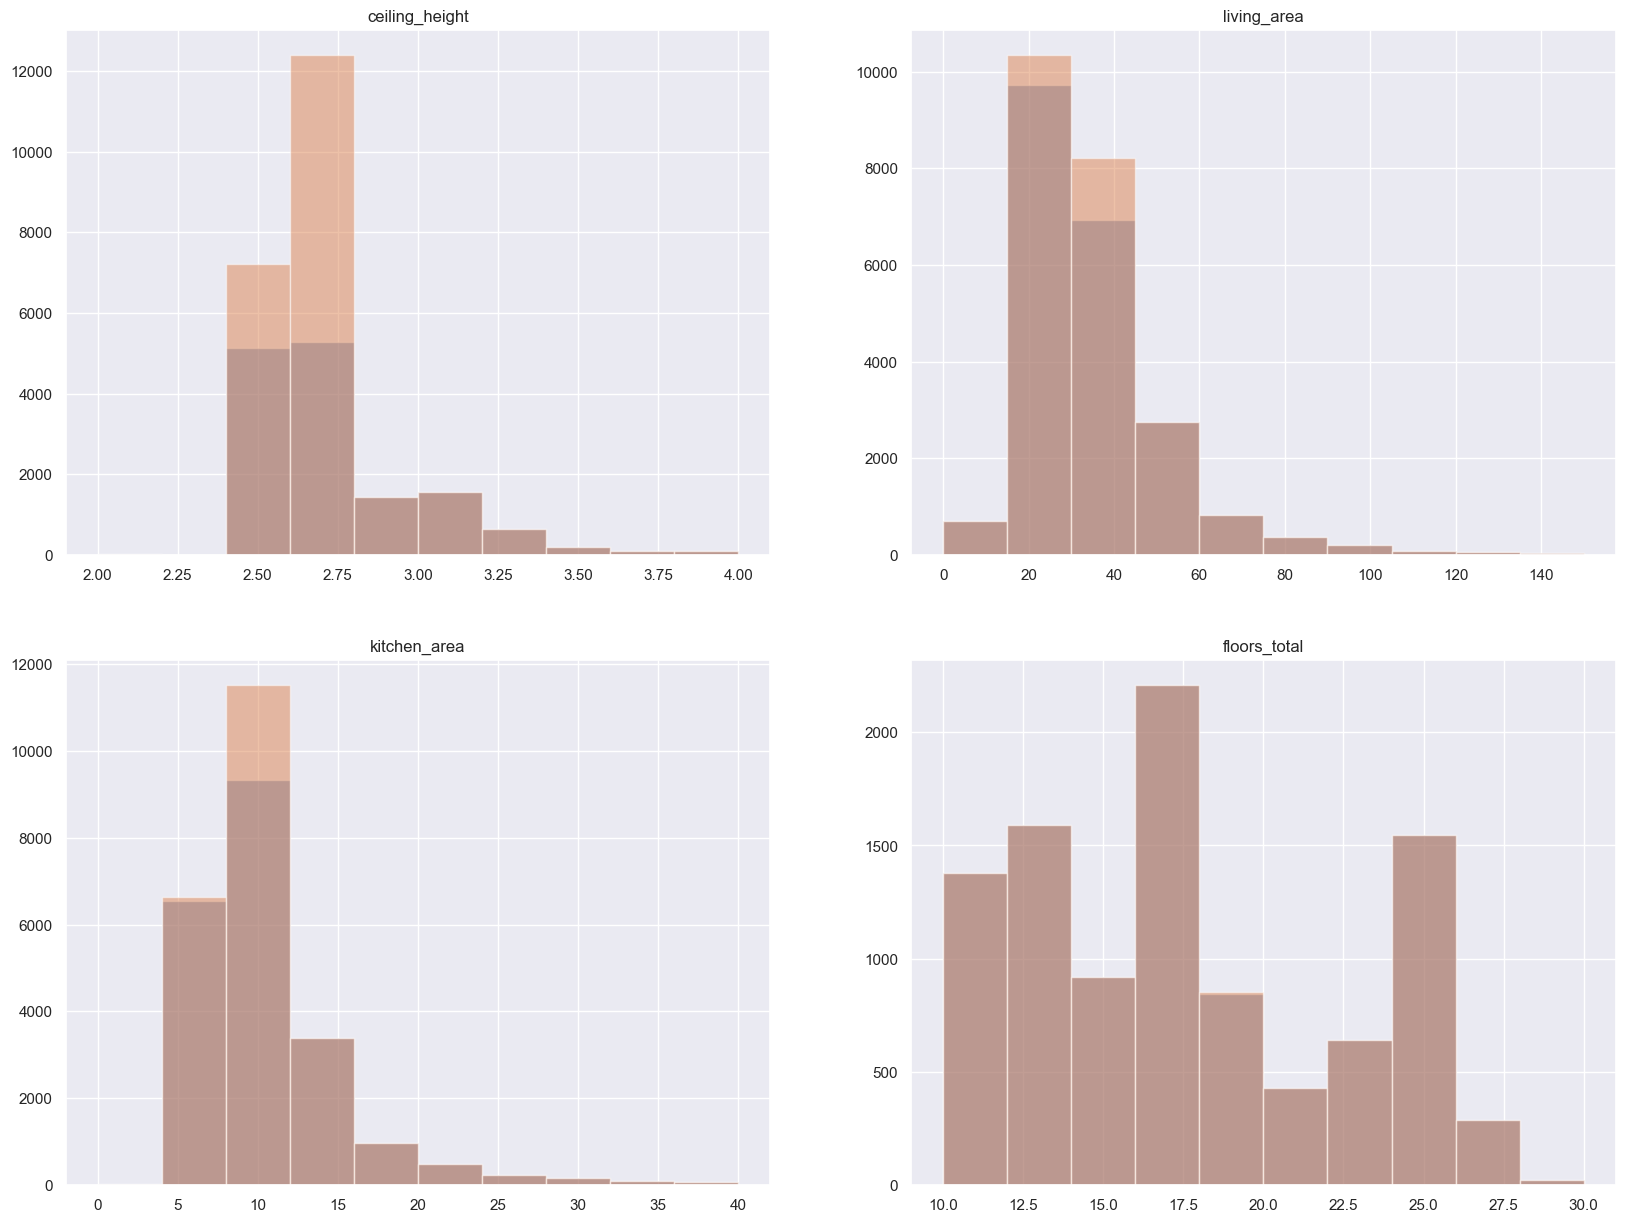

In [86]:
fig = plt.figure(figsize = (20,15))
up_left_ax = fig.add_subplot(221)
up_right_ax = fig.add_subplot(222)
down_left_ax = fig.add_subplot(223)
down_right_ax = fig.add_subplot(224)
up_left_ax.set_title("ceiling_height")
up_right_ax.set_title("living_area")
down_left_ax.set_title("kitchen_area")
down_right_ax.set_title("floors_total")

data_to_plot = data.dropna(subset = ["ceiling_height"])
up_left_ax.hist(x = data_to_plot["ceiling_height"], alpha = 0.5, range=(2,4), bins = 10)
up_left_ax.hist(x = data_fill_values["ceiling_height"], alpha = 0.5, range = (2,4), bins = 10)
data_to_plot = data.dropna(subset = ["living_area"])
up_right_ax.hist(x = data_to_plot["living_area"], alpha = 0.5, bins = 10, range = (0, 150))
up_right_ax.hist(x = data_fill_values["living_area"], alpha = 0.5, bins = 10, range = (0, 150))
data_to_plot = data.dropna(subset = ["kitchen_area"])
down_left_ax.hist(x = data_to_plot["kitchen_area"], alpha = 0.5, bins = 10, range = (0, 40))
down_left_ax.hist(x = data_fill_values["kitchen_area"], alpha = 0.5, bins = 10, range = (0, 40))
data_to_plot = data.dropna(subset = ["floors_total"])
down_right_ax.hist(x = data_to_plot["floors_total"], alpha = 0.5, bins = 10, range = (10, 30))
down_right_ax.hist(x = data_fill_values["floors_total"], alpha = 0.5, bins = 10, range = (10, 30))
pass

Распределение сместилось в область, близкую к самому частому значению, однако в случае с, к примеру, высотой потолка это кажется разумно. Заполнение всех пропусков ммедианой по выборке было бы очевидно хуже, поэтому оставим такое заполнение данных. Столбец `is_little` уберем.

In [87]:
data = data_fill_values.iloc[:,:22]

Преобразуем тип данных столбцов `floors_total`, `parks_around3000`, `ponds_around3000`, `days_exposition`, `balcony`:

In [88]:
data[["floors_total", "parks_around3000", "ponds_around3000", "balcony"]] = data[["floors_total", "parks_around3000", "ponds_around3000", "balcony"]].astype("int64")

Преобразуем тип данных столбца `is_apartment`:

In [89]:
data["is_apartment"] = data["is_apartment"].astype(bool)

Преобразуем тип данных столбца `first_day_exposition`:

В таблице дата уже округлена с точностью до дня, поэтому всю информацию о времени суток можно отбросить как ненужную.

In [90]:
data["first_day_exposition"] = pd.to_datetime(data["first_day_exposition"], format = "%Y-%m-%dT%H:%M:%S")


Проверим итог проделанной работы:

In [91]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,31.3,9,False,...,9.9,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Пропуски в данных успешно заполнены и типы преобразованы к более удобным. Можно приступать к следующему этапу.

## Расчёты и добавление результатов в таблицу

Добавим несколько новых столбцов в таблицу для более удобного последующего анализа.

Рассчитвем и добавим в таблицу цену квадратного метра:

In [92]:
data["square_meter_price"] = data["last_price"] / data["total_area"]

Проверим корректность результата:

In [93]:
data[["square_meter_price", "total_area", "last_price"]]

,square_meter_price,total_area,last_price
0,120370.370370,108.00,13000000.0
1,82920.792079,40.40,3350000.0
2,92785.714286,56.00,5196000.0
3,408176.100629,159.00,64900000.0
4,100000.000000,100.00,10000000.0
...,...,...,...
23694,72490.845228,133.81,9700000.0
23695,52542.372881,59.00,3100000.0
23696,44091.710758,56.70,2500000.0
23697,149511.400651,76.75,11475000.0


Новый столбец содержит корректные данные

Добавим столбец с информацией о том, является ли этаж первым, последним или находится между ними:

In [94]:
def what_floor(row):
    if row["floor"] == 1:
        return "первый"
    elif row["floor"] == row["floors_total"]:
        return "последний"
    else:
        return "другой"

data["floor_type"] = data.apply(what_floor, axis = 1)

Проверим корректность рассчитаных данных:

In [95]:
data[["floor_type", "floor", "floors_total"]]

,floor_type,floor,floors_total
0,другой,8,16
1,первый,1,11
2,другой,4,5
3,другой,9,14
4,другой,13,14
...,...,...,...
23694,другой,3,5
23695,другой,4,5
23696,первый,1,3
23697,другой,12,17


Добавим столбец с рассчетом соотношения жилой площади с общей и отношения площади кухни к общей:

In [96]:
data["living_to_total_ratio"] = data["living_area"] / data["total_area"]
data["kitchen_to_total_ratio"] = data["kitchen_area"] / data["total_area"]

Проверим результат:

In [97]:
data[["living_to_total_ratio", "kitchen_to_total_ratio", "living_area", "kitchen_area", "total_area"]]

,living_to_total_ratio,kitchen_to_total_ratio,living_area,kitchen_area,total_area
0,0.472222,0.231481,51.0,25.00,108.00
1,0.460396,0.272277,18.6,11.00,40.40
2,0.612500,0.148214,34.3,8.30,56.00
3,0.196855,0.062264,31.3,9.90,159.00
4,0.320000,0.410000,32.0,41.00,100.00
...,...,...,...,...,...
23694,0.547792,0.103356,73.3,13.83,133.81
23695,0.644068,0.144068,38.0,8.50,59.00
23696,0.523810,0.144621,29.7,8.20,56.70
23697,0.407818,0.303583,31.3,23.30,76.75


Таким образом, предобработка данных закончена: пропуски заполнены, типы данных приведены к более удобным, рассчитаны и добавлены новые полезные характеристики. Можно начинать их исследование.

## Исследовательский анализ данных

### Поиск и обработка аномальных значений

Приступим к изучению данных, находящихся в датасете. Посмотрим на гистограммы для различных столбцов, чтобы изучить аномальные значения.

Рассмотрим распределение для всех столбцов и информацию о данных:

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.728538,10.669227,34.067309,5.892358,10.470057,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634,9.942166e+04,0.566351,0.190431
std,5.682529,1.088701e+07,35.654083,1.078405,0.988870,6.587909,21.192116,4.885249,5.629698,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988,5.030680e+04,0.124466,0.077318
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.021583,0.019800
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.300000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.658547e+04,0.489770,0.133929
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.200000,4.000000,9.520000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000,9.500000e+04,0.567315,0.174400
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,1.142563e+05,0.641738,0.235672
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,2.407692,0.825000


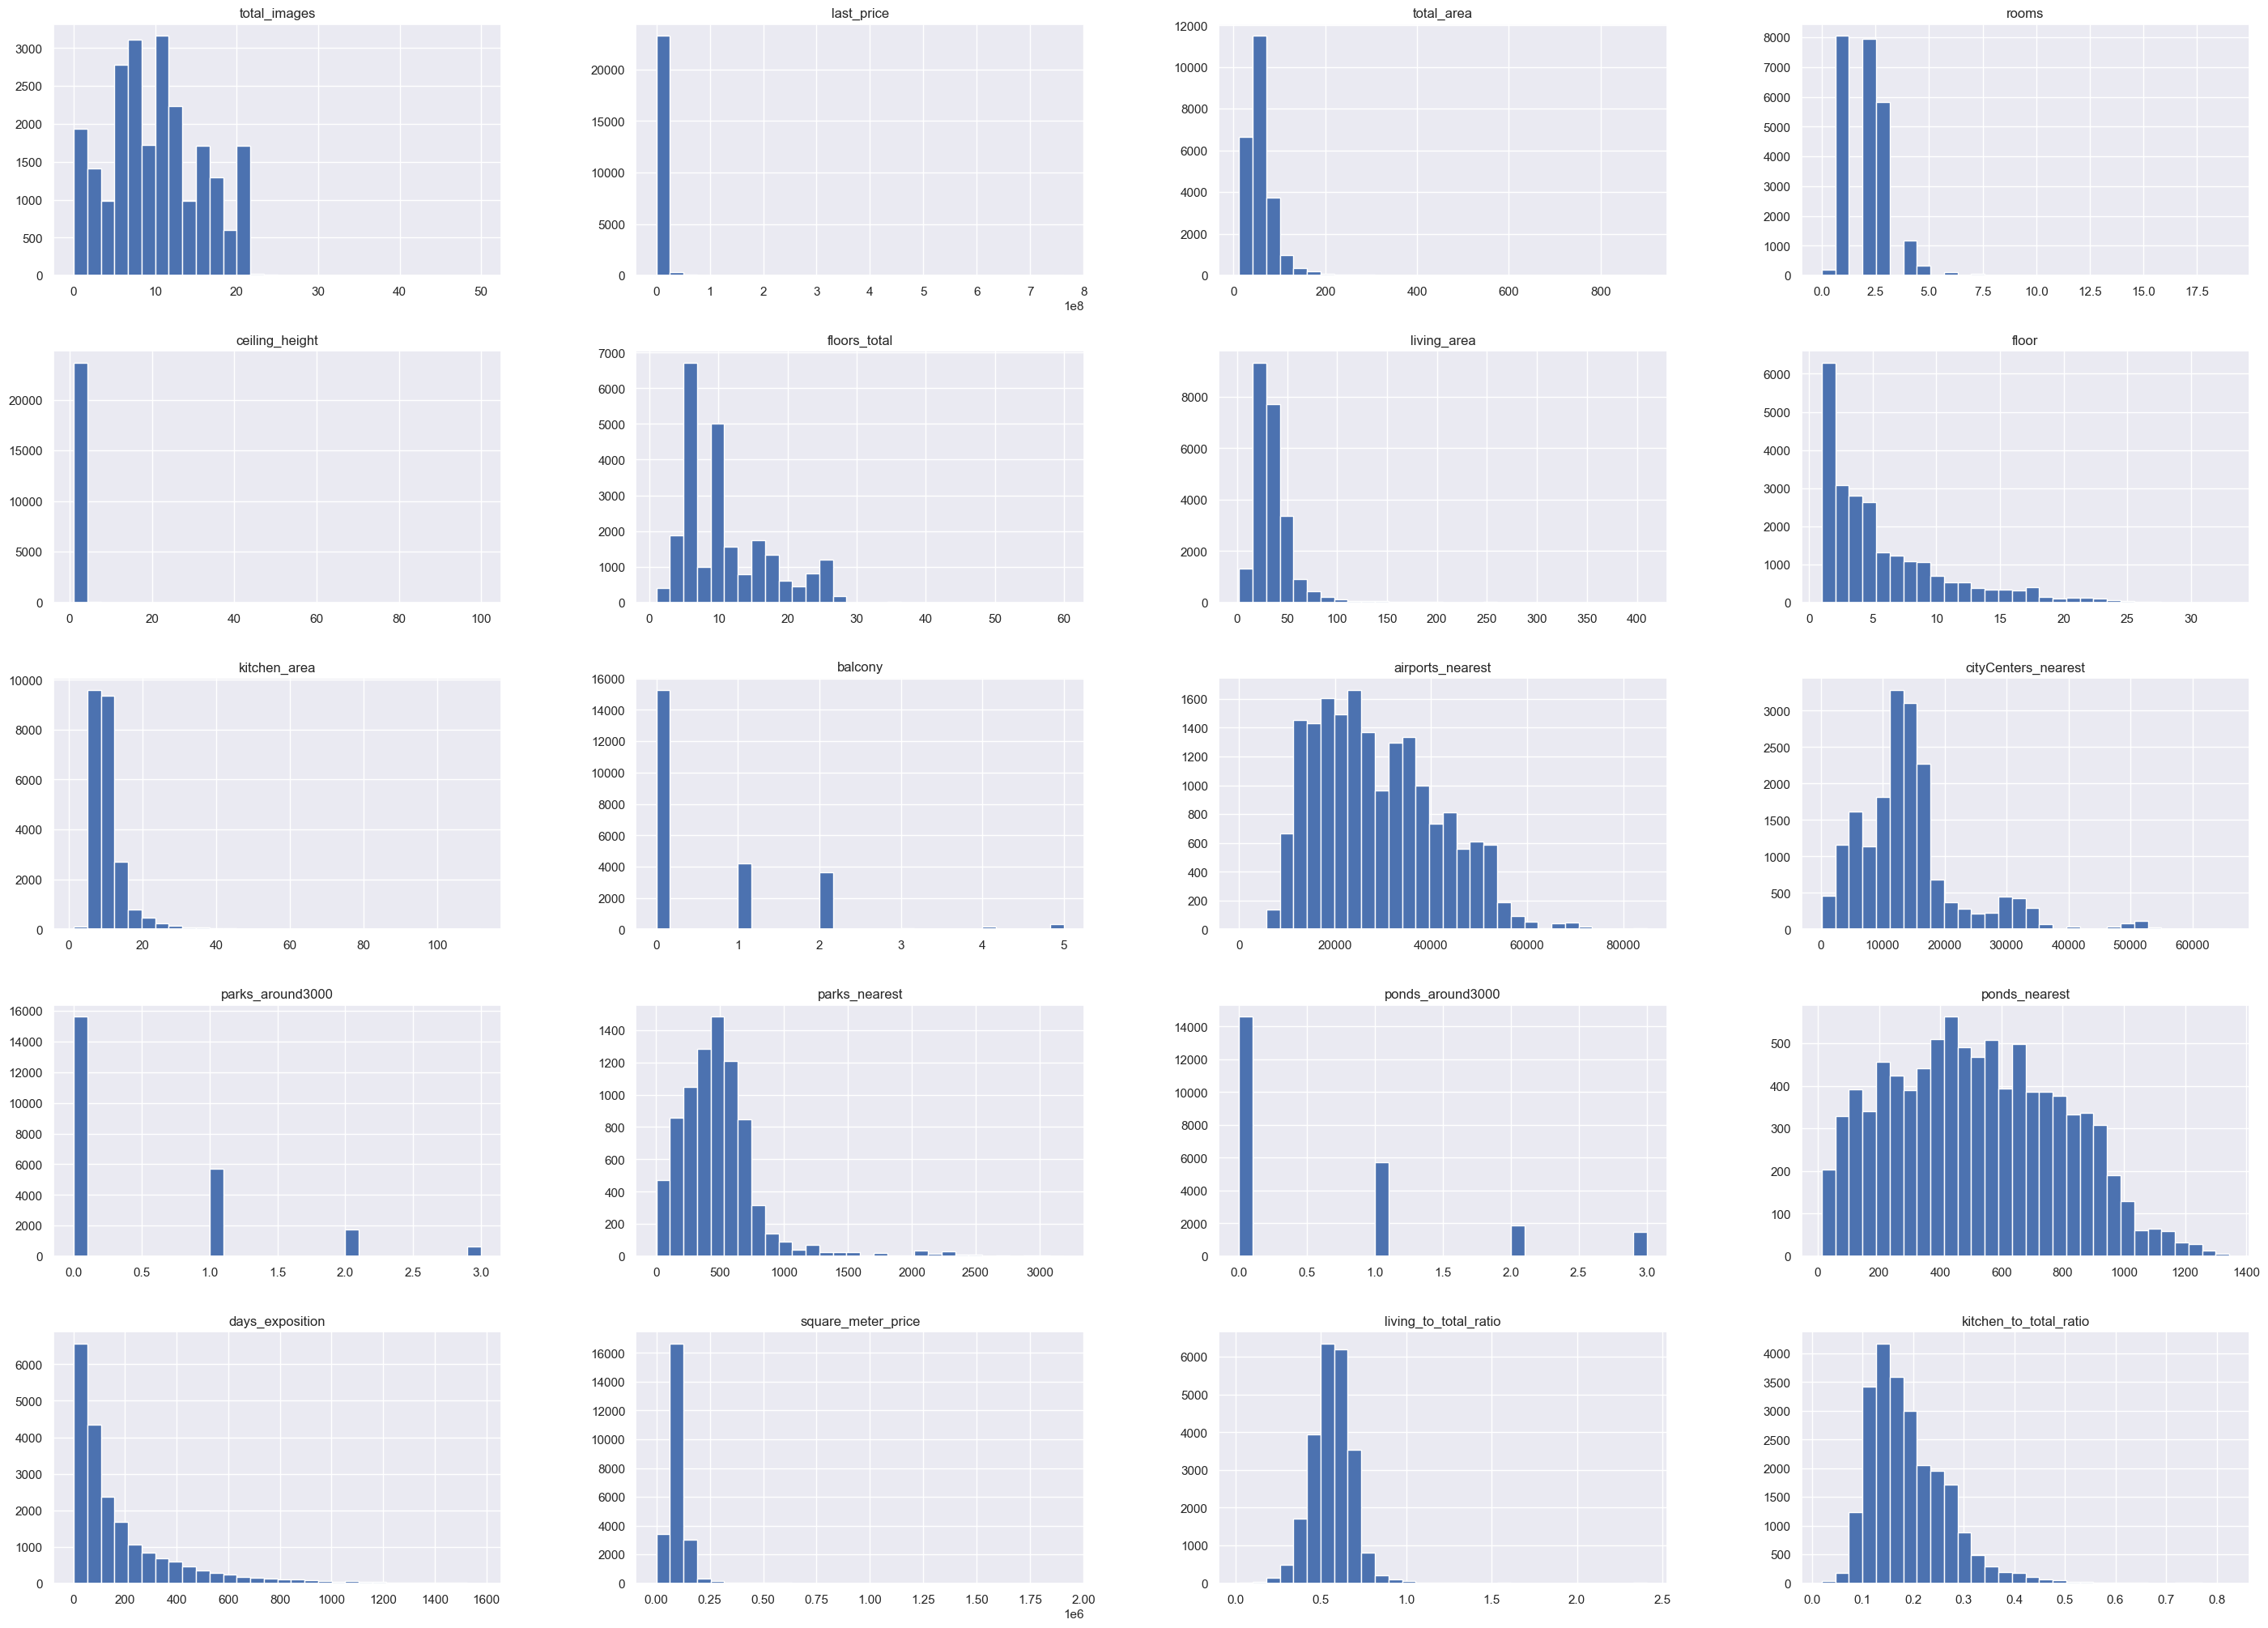

In [104]:
columns = ['total_images',
 'last_price',
 'total_area',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'kitchen_area',
 'balcony',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition',
 'square_meter_price', 
 'living_to_total_ratio',
 'kitchen_to_total_ratio'
          ]
data[columns].hist(figsize = (35,25), bins = 30)
data[columns].describe()

После изучения распределений и общей информации о таблице можно сделать следующее заключение.
* `total_images`: Распределение этого параметра кажется нормальным, не одержащим аномалий. Можно заметить, что пик распределения находится на адекватном значении - 10 фотографий. В глаза также бросается факт наличия довольно больших значений: порядка 50 фотографий. Это можно объяснить тем, что кто-то решил прикрепить фотографию каждого уголка квартиры или тем, что сама квартира имеет много особенностей, каждую из которых надо сфотографировать. В целом, такие значения можно оставить.
* `last_price`: Необходимо более подробно изучить этот параметр, распределению мешают очень большие значения. Максимальной ценой является 763 миллиона. Цифра не кажется нереалистичной. Скорее всего в базу данных попала продажа какого-то дорогого элитного коттеджа, цена на которые может даже превышать это цифру.
* `total_area`: Можно заметить, что максимальное значение - 900 квадратных метров, что не кажется реалистичным, потому что даже в роскошных особняках размер варируется от 150 до 400 квадратных метров. Значения этого столбца следует изучить более подробно, чтобы определить, что делать с подобными значениями.
* `rooms`: В данных присутствует несколько домов с нулем комнат. Возможно это какая-то ошибка системы или же это значения указывали те, кто продавали квартиры-студии, считая, что в них 0 комнат. 19 комнат могут быть вполне реалистичными, если это будет соответствовать какому-нибудь особняку с большой площадью. Этот столбец необходимо изучить более подробно.
* `ceiling_height`: В этом столбце содержатся аномально маленькие значения (например 1 метр) и аномально большие (около 100 метров). Необходимо более детально рассмотреть этот столбец и решить, что делать с этими аномалиями.
* `floors_total`: Значения больше 40 можно считать аномальными, потому что даже в самых высоких небоскребах, находящихся в Петербурге количество этажей порядка 40.
* `living_area`: Очень маленькие и очень большие значения кажутся нереалистичными и нуждаются в дополнительном исследовании.
* `floor`: Распределение по этому столбцу кажется вполне адекватным.
* `kitchen_area`: Необходимо дополнительное исследование, потому что в данном столбце находятся подозрительно маленькие и подозрительно большие значения. 
* `balcony`: Распределение по этому столбцу кажется вполне адекватным.
* `airports_nearest`: Распределение по этому столбцу кажется вполне адекватным. Наличие небольшого количесва нулевых значений можно объяснить тем, что 0 был поставлен, поскольку ближайший аэропорт слишком далеко или слишком близко
* `cityCenters_nearest`: Распределение по этому столбцу кажется вполне адекватным.
* `parks_around3000`: Распределение по этому столбцу кажется вполне адекватным.
* `parks_nearest`: Распределение по этому столбцу кажется вполне адекватным.
* `ponds_around3000`: Распределение по этому столбцу кажется вполне адекватным.
* `ponds_nearest`: Распределение по этому столбцу кажется вполне адекватным.
* `days_exposition`: Можно увидеть пик около нулевых значений. Скорее всего это объявления, которые были удалены почти сразу из-за каких-то ошибок. Возможно не стоит учитывать эти данные, они могут повредить точности выводов.
* `square_meter_price`: В этом параметре содержатся как аномально маленькие значения, так и аномально большие. Такие аномалии необходимо отсеять, потому что они, вполне вероятно, были указаны по ошибке или результат каких-либо мошеннических действий.
* `living_to_total_ratio`, `kitchen_to_total_ratio`: Пристутствуют как аномально большие, так и аномально маленькие значения. Необходимо детальнее рассмотреть этот параметр, потому что такие артефакты могли получиться в результате неправильного заполнения пропусков. 0.75 квантиль у обоих параметорв кажется адекватной, поэтому вполне вероятно, что это какие-то выбросы.

Изучим параметр `last_price`. Построим распределение без учета слишком больших значений и рассмотрим объекты, имеющую выбивабщуюся из общей массы цену:

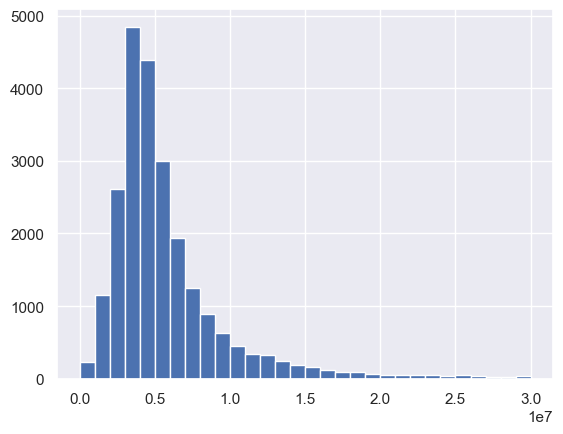

In [105]:
data["last_price"].hist(bins = 30, range = (0, 0.3e8))
pass

In [106]:
data.query("last_price > 0.3e8")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,31.30,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.100629,другой,0.196855,0.062264
51,7,45000000.0,161.0,2017-10-17,3,3.20,8,38.00,4,False,...,6589.0,0,NaN,3,99.0,541.0,279503.105590,другой,0.236025,0.310559
121,20,33000000.0,180.0,2017-02-17,3,2.90,9,86.00,8,False,...,4264.0,1,633.0,0,NaN,144.0,183333.333333,другой,0.477778,0.133333
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.00,3,False,...,1771.0,2,508.0,3,366.0,62.0,302839.116719,последний,0.577287,0.031230
262,14,37500000.0,158.0,2019-01-24,4,2.70,12,88.00,4,False,...,4593.0,0,NaN,2,840.0,NaN,237341.772152,другой,0.556962,0.253165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000.0,297.5,2018-09-09,6,3.14,4,181.80,2,False,...,1229.0,3,189.0,3,40.0,42.0,103361.344538,другой,0.611092,0.073613
23091,20,33000000.0,186.0,2017-10-11,3,3.00,5,130.00,3,False,...,3359.0,0,NaN,0,NaN,138.0,177419.354839,другой,0.698925,0.086022
23327,19,34400000.0,215.0,2019-03-15,5,2.75,4,82.40,4,False,...,15419.0,0,NaN,0,NaN,NaN,160000.000000,последний,0.383256,0.186512
23395,4,40000000.0,188.0,2017-05-29,6,2.70,6,109.51,4,False,...,2254.0,2,425.0,1,62.0,30.0,212765.957447,другой,0.582500,0.166489


Дома стоимость которых превышает 30 миллионов, скорее всего можно не рассматривать. Такие значения могу негативно сказаться на качестве анализа, поскольку рынок элитной недвижимости, скорее всего, имеет свои особенности, отличные от особенностей рынка обычной недвижимости. Количество подобных предложений довольно мало, их можно удалить, не опасаясь, что в последствии может не хватить данных.

Помимо слишком больших значений можно заметить слишком маленькие значения. Рассмотрим их подробнее:

In [107]:
(data.query("last_price < 7e5"))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
247,7,650000.0,31.0,2017-01-20,1,2.55,3,29.0,1,False,...,NaN,0,NaN,0,NaN,378.0,20967.741935,первый,0.935484,0.264516
268,7,650000.0,46.0,2018-03-15,2,2.50,5,30.0,5,False,...,NaN,0,NaN,0,NaN,75.0,14130.434783,последний,0.652174,0.152174
1053,13,550000.0,29.0,2018-02-01,1,5.00,3,29.0,1,False,...,NaN,0,NaN,0,NaN,6.0,18965.517241,первый,1.000000,0.282759
1358,10,550000.0,27.6,2019-03-06,1,2.50,5,17.0,2,False,...,NaN,0,NaN,0,NaN,22.0,19927.536232,другой,0.615942,0.217391
1669,9,650000.0,42.0,2019-04-27,2,2.55,5,26.0,5,False,...,NaN,0,NaN,0,NaN,NaN,15476.190476,последний,0.619048,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,9,560000.0,28.5,2018-08-11,1,2.60,4,17.2,4,False,...,NaN,0,NaN,0,NaN,198.0,19649.122807,последний,0.603509,0.200000
23067,8,600000.0,31.8,2019-04-24,1,2.55,2,20.0,1,False,...,NaN,0,NaN,0,NaN,NaN,18867.924528,первый,0.628931,0.220126
23153,9,650000.0,41.0,2017-10-13,2,2.55,3,28.0,1,False,...,NaN,0,NaN,0,NaN,14.0,15853.658537,первый,0.682927,0.146341
23484,11,470000.0,44.5,2018-07-02,2,2.55,2,28.0,2,False,...,NaN,0,NaN,0,NaN,298.0,10561.797753,последний,0.629213,0.168539


In [108]:
data.query("last_price < 7e5").describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,1.0,1.0,69.000000,1.0,69.0,0.0,60.000000,69.000000,69.000000,69.000000
mean,7.797101,568292.608696,38.935652,1.434783,2.612029,4.072464,23.868116,2.869565,7.659420,0.217391,36421.0,9176.0,0.014493,805.0,0.0,NaN,154.150000,15576.384513,0.619115,0.198494
std,4.797609,100315.740388,11.291720,0.527989,0.309884,2.891767,6.326473,3.048206,4.252623,0.510754,NaN,NaN,0.120386,NaN,0.0,NaN,194.302998,4161.203756,0.113016,0.057821
min,0.000000,12190.000000,26.400000,1.000000,2.500000,1.000000,15.100000,1.000000,5.400000,0.000000,36421.0,9176.0,0.000000,805.0,0.0,NaN,6.000000,111.834862,0.293578,0.115385
25%,5.000000,500000.000000,31.000000,1.000000,2.550000,2.000000,17.300000,1.000000,6.000000,0.000000,36421.0,9176.0,0.000000,805.0,0.0,NaN,44.750000,12702.702703,0.546875,0.152174
50%,7.000000,600000.000000,37.000000,1.000000,2.550000,5.000000,25.500000,2.000000,7.000000,0.000000,36421.0,9176.0,0.000000,805.0,0.0,NaN,71.500000,15348.837209,0.600414,0.194767
75%,10.000000,650000.000000,43.500000,2.000000,2.550000,5.000000,29.000000,4.000000,8.200000,0.000000,36421.0,9176.0,0.000000,805.0,0.0,NaN,196.500000,18895.348837,0.674419,0.220126
max,20.000000,690000.000000,109.000000,3.000000,5.000000,25.000000,40.000000,25.000000,40.500000,2.000000,36421.0,9176.0,1.000000,805.0,0.0,NaN,924.000000,24621.212121,1.000000,0.437500


Цена квадратного метра кажется слишком маленькой. Такая маленькая цена за квадратный метр может быть вызвана тем, что эти квартиры продаются в каких-то вымирающих поселках, где недвижимость стоит совсем мало. Такие значения также стоит убрать, потому что они негативно могу сказаться на результатах анализа.

Уберем вышеуказанные значения:

In [109]:
data = data.query("last_price > 7e5 and last_price < 0.3e8")
data = data.reset_index(drop = True)

Изучим столбец `total_area` более подробно:

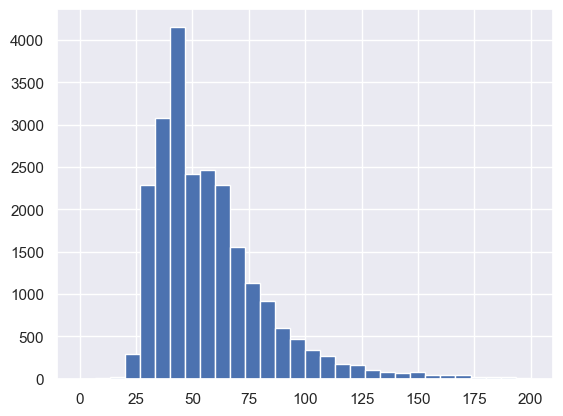

In [110]:
data["total_area"].hist(bins = 30, range = (0, 200))
pass

In [111]:
data.query("total_area > 250")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
845,5,25000000.0,363.00,2017-12-23,14,3.16,5,222.0,4,False,...,7950.0,0,NaN,2,435.0,418.0,68870.523416,другой,0.611570,0.045730
2436,9,12500000.0,255.00,2017-04-21,3,2.70,2,153.9,2,False,...,6916.0,0,NaN,3,198.0,102.0,49019.607843,последний,0.603529,0.394902
3202,1,25092624.0,266.20,2015-12-08,5,3.00,3,155.1,1,False,...,5065.0,0,NaN,2,471.0,660.0,94262.299023,первый,0.582645,0.043576
3606,12,28789000.0,441.98,2019-01-23,4,2.70,6,31.3,6,False,...,5181.0,0,NaN,0,NaN,NaN,65136.431513,последний,0.070818,0.079302
4076,6,23000000.0,272.60,2018-01-11,10,3.14,7,145.9,7,False,...,12169.0,1,191.0,1,531.0,NaN,84372.707263,последний,0.535216,0.068966
4126,8,24900000.0,281.10,2018-02-21,6,3.30,5,193.5,3,False,...,2453.0,3,75.0,1,795.0,126.0,88580.576307,другой,0.688367,0.094628
4460,25,26000000.0,290.00,2017-11-16,5,2.80,17,141.0,16,False,...,5608.0,0,NaN,1,153.0,120.0,89655.172414,другой,0.486207,0.155172
4746,20,29000000.0,253.00,2017-12-27,7,3.50,5,180.0,5,False,...,4821.0,1,694.0,1,650.0,NaN,114624.505929,последний,0.711462,0.092095
9236,10,16073000.0,263.80,2019-01-30,3,2.70,19,31.3,4,False,...,4400.0,0,NaN,0,NaN,35.0,60928.733889,другой,0.118650,0.088779
9386,10,23500000.0,313.00,2017-02-13,9,3.20,6,179.2,5,False,...,10138.0,1,146.0,0,NaN,NaN,75079.872204,другой,0.572524,0.042173


In [112]:
data.query("total_area > 250").describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,17.000000,29.000000,17.000000,23.000000,29.000000,29.000000,29.000000
mean,10.103448,2.391337e+07,302.092414,6.551724,2.934828,6.586207,158.275862,5.206897,27.209310,0.206897,28731.137931,9006.103448,0.931034,431.058824,1.068966,413.352941,319.304348,81088.772208,0.539704,0.093205
std,6.320855,4.911403e+06,56.342715,2.946986,0.301373,4.880846,57.062489,4.353810,17.803539,0.412251,11516.410991,6271.183571,0.961065,227.503975,1.131719,272.865796,381.232384,20549.008678,0.187753,0.067754
min,1.000000,1.250000e+07,250.200000,3.000000,2.600000,2.000000,31.300000,1.000000,9.900000,0.000000,10328.000000,1214.000000,0.000000,75.000000,0.000000,65.000000,8.000000,43402.777778,0.070818,0.023449
25%,5.000000,2.210000e+07,263.800000,5.000000,2.700000,4.000000,137.700000,3.000000,16.600000,0.000000,20687.000000,4821.000000,0.000000,263.000000,0.000000,194.000000,87.000000,65136.431513,0.486207,0.059322
50%,10.000000,2.500000e+07,284.000000,6.000000,2.800000,5.000000,177.300000,4.000000,24.000000,0.000000,24892.000000,5671.000000,1.000000,516.000000,1.000000,435.000000,126.000000,83333.333333,0.582645,0.082824
75%,14.000000,2.800000e+07,316.300000,7.000000,3.140000,6.000000,190.000000,5.000000,32.900000,0.000000,38076.000000,12169.000000,2.000000,570.000000,2.000000,531.000000,443.000000,94262.299023,0.642557,0.112594
max,25.000000,2.950000e+07,460.800000,16.000000,3.800000,19.000000,279.600000,17.000000,100.700000,1.000000,53531.000000,29445.000000,3.000000,852.000000,3.000000,934.000000,1365.000000,117905.675460,0.788333,0.394902


Все эти дома, находятся около Санкт-Петербурга и при этои имеют довольно большое расстояние до центра города. Также количество комнат почти во всех этих домах больше обычного, а общее количество этажей, в основном, маленькое. Цены на квадратный метр, вполне подходящие. Также среднее количество дней, после которого объявление снимается довольно большое в сравнении с общими данными. На основании этого, можно сделать вывод, что это какие-то премиальные квартиры за пределами города. Максимальная площадь 460 квадратных метров кажется очень большой, но она возможна. Поэтому принято решение, ничего не делать с этими объектами.

Изучим количество комнат:

In [113]:
data.query("rooms < 1")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
141,1,2450000.0,27.00,2017-03-30,0,2.70,24,15.50,2,False,...,NaN,0,NaN,0,NaN,181.0,90740.740741,другой,0.574074,0.384074
340,4,2320000.0,25.00,2017-09-27,0,2.75,14,17.00,1,False,...,NaN,0,NaN,0,NaN,45.0,92800.000000,первый,0.680000,0.417600
430,8,2480000.0,27.11,2018-03-12,0,2.70,17,24.75,4,False,...,15015.0,0,NaN,2,982.0,64.0,91479.158982,другой,0.912947,0.365179
496,0,3375000.0,34.40,2017-03-28,0,2.64,26,24.30,19,False,...,19292.0,0,NaN,1,593.0,430.0,98110.465116,другой,0.706395,0.319767
594,2,1850000.0,25.00,2019-02-20,0,2.63,10,28.20,7,False,...,NaN,0,NaN,0,NaN,29.0,74000.000000,другой,1.128000,0.432000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22811,7,3200000.0,26.00,2017-09-01,0,2.70,25,18.00,16,False,...,13222.0,0,NaN,1,623.0,14.0,123076.923077,другой,0.692308,0.380769
23040,0,2500000.0,27.70,2017-09-28,0,2.70,24,18.00,4,False,...,NaN,0,NaN,0,NaN,4.0,90252.707581,другой,0.649819,0.374368
23151,15,3350000.0,26.00,2018-09-07,0,2.70,19,31.30,8,False,...,17092.0,0,NaN,2,112.0,31.0,128846.153846,другой,1.203846,0.380769
23188,10,1450000.0,29.00,2017-11-11,0,2.55,9,18.00,8,False,...,NaN,0,NaN,0,NaN,82.0,50000.000000,другой,0.620690,0.282759


In [114]:
data.query("rooms < 1").describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,196.000000,1.960000e+02,196.000000,196.0,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,117.000000,117.000000,196.000000,28.000000,196.000000,68.000000,182.000000,196.000000,196.000000,196.000000
mean,7.790816,2.992508e+06,27.536276,0.0,2.856071,16.857143,19.495765,8.591837,9.884337,1.015306,24510.102564,13451.247863,0.173469,588.928571,0.489796,525.191176,109.285714,108090.351087,0.713601,0.377153
std,5.088158,1.412537e+06,8.368574,0.0,1.751543,6.931163,6.869360,6.303986,0.651408,0.925297,12440.055749,5003.661385,0.453488,306.655426,0.787660,276.762858,159.279163,27414.375994,0.166375,0.076671
min,0.000000,9.457500e+05,15.500000,0.0,2.500000,3.000000,2.000000,1.000000,8.200000,0.000000,6989.000000,1261.000000,0.000000,38.000000,0.000000,72.000000,3.000000,34375.000000,0.086957,0.100610
25%,4.000000,2.300000e+06,24.037500,0.0,2.700000,12.000000,16.475000,3.000000,9.900000,0.000000,14509.000000,11618.000000,0.000000,392.750000,0.000000,345.250000,27.250000,91141.906874,0.639399,0.341379
50%,7.000000,2.700000e+06,26.025000,0.0,2.700000,17.000000,18.000000,7.000000,9.900000,1.000000,21460.000000,13615.000000,0.000000,532.000000,0.000000,527.500000,49.500000,105326.797386,0.690473,0.380769
75%,11.000000,3.376250e+06,28.325000,0.0,2.750000,23.000000,20.000000,13.000000,10.370000,2.000000,34201.000000,16414.000000,0.000000,775.750000,1.000000,683.250000,118.250000,125250.000000,0.756728,0.415938
max,21.000000,1.630000e+07,98.400000,0.0,27.000000,35.000000,68.000000,26.000000,11.000000,2.000000,55551.000000,29846.000000,2.000000,1199.000000,3.000000,1159.000000,931.000000,231960.000000,1.647368,0.638710


можно заметить, что суммарная площадь таких домов довольно мала и при этои близка к площади квартир-студий. Оставим эти значения, учитывая тот факт, что нулю комнат соответствуют квартиры-студии.

In [115]:
data.query("rooms>9")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
632,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,False,...,3148.0,0,NaN,0,NaN,NaN,95264.017420,последний,0.755580,0.072401
845,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,7950.0,0,NaN,2,435.0,418.0,68870.523416,другой,0.611570,0.045730
4076,6,23000000.0,272.6,2018-01-11,10,3.14,7,145.9,7,False,...,12169.0,1,191.0,1,531.0,NaN,84372.707263,последний,0.535216,0.068966
17805,4,15500000.0,216.1,2016-07-04,10,3.15,5,161.4,2,False,...,4921.0,1,368.0,0,NaN,11.0,71726.052753,другой,0.746876,0.091624
18524,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,4142.0,1,516.0,0,NaN,1365.0,105555.555556,последний,0.666667,0.048148
20470,6,28659000.0,245.4,2016-03-31,14,2.70,4,168.3,2,False,...,2054.0,3,541.0,2,118.0,95.0,116784.841076,другой,0.685819,0.105542


Всем этим значениям соответствует довольно большая суммарная площадь. Поэтому оставим эти строки в данных.

Изучим параметр `ceiling_height`:

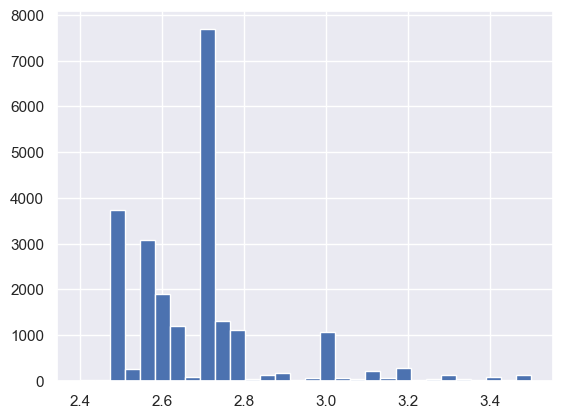

In [116]:
data["ceiling_height"].hist(bins = 30, range = (2.4, 3.5))
pass

In [117]:
data.query("ceiling_height < 2")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
5620,5,1500000.0,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,NaN,0,NaN,0,NaN,248.0,35046.728972,первый,0.642523,0.121495
16640,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,20444.0,0,NaN,3,80.0,71.0,102500.000000,другой,0.435000,0.208500
22204,16,6000000.0,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,14217.0,2,293.0,2,289.0,13.0,109090.909091,другой,0.589091,0.181818


Такие данные можно выкинуть, потому что такие значения высоты потолка совсем не кажутся реалистичными.

In [118]:
data.query("ceiling_height > 5")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
346,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,NaN,0,NaN,0,NaN,259.0,65217.391304,другой,0.579710,0.145833
3085,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,NaN,0,NaN,0,NaN,NaN,38666.666667,другой,0.706667,0.106667
3405,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.3,2,False,...,NaN,0,NaN,0,NaN,125.0,46666.666667,другой,0.510000,0.243333
4566,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,...,13256.0,1,658.0,1,331.0,181.0,95555.555556,другой,0.666667,0.155556
4798,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,...,NaN,0,NaN,0,NaN,28.0,120000.000000,другой,0.680000,0.414800
4993,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,8389.0,3,397.0,1,578.0,7.0,126229.508197,первый,0.639344,0.180328
5162,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,NaN,0,NaN,0,NaN,540.0,46296.296296,другой,0.555556,0.166667
5579,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,...,10912.0,1,305.0,0,NaN,267.0,88000.000000,другой,0.426000,0.140000
5715,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,20444.0,0,NaN,3,80.0,38.0,101875.000000,другой,0.512500,0.150000
5771,20,5650000.0,45.0,2018-08-15,1,8.3,16,19.3,14,False,...,10763.0,0,NaN,1,613.0,14.0,125555.555556,другой,0.428889,0.184444


Потолки более 5 метров в домах особенно в домах с большим количеством этажей кажутся нереалистичными. Уберем эти данные из рассмотрения.

In [119]:
data = data.query("2 < ceiling_height < 5")
data = data.reset_index(drop = True)

Исследуем столбец `floors_total`:

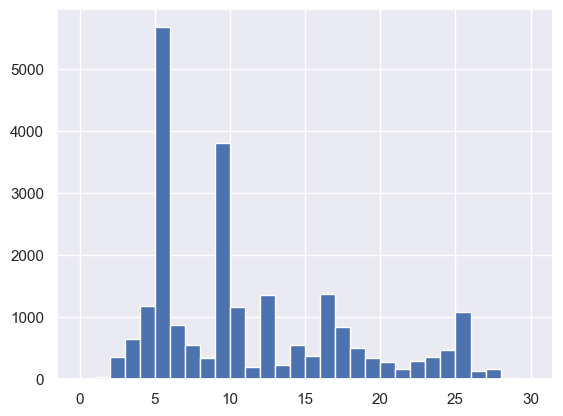

In [120]:
data["floors_total"].hist(bins = 30, range = (0, 30))
pass

In [121]:
data.query("floors_total > 40")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
2202,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,49488.0,2,342.0,3,614.0,166.0,83516.483516,другой,0.602198,0.162637
16417,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,12978.0,1,793.0,0,NaN,45.0,99450.000000,другой,0.262500,0.350000


Такие значения можно убрать, потому что они нереалистичны и сильно выбиваются из общего распределения.

In [122]:
data = data.query("floors_total < 40")
data = data.reset_index(drop = True)

Изучим данные из `living_area`:

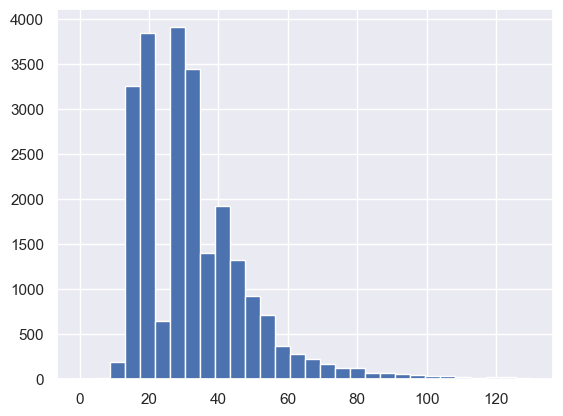

In [123]:
data["living_area"].hist(bins = 30, range = (0, 130))
pass

In [124]:
data.query("living_area < 6")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
3173,7,4440000.0,41.0,2017-07-02,1,2.7,17,3.0,17,False,...,13073.0,0,NaN,0,NaN,216.0,108292.682927,последний,0.073171,0.268293
13660,20,6350000.0,52.0,2018-02-06,2,3.0,6,2.0,2,False,...,6521.0,0,NaN,1,1012.0,91.0,122115.384615,другой,0.038462,0.173077
17245,11,2680000.0,22.0,2018-08-11,0,2.7,25,5.0,8,False,...,11618.0,1,835.0,1,652.0,70.0,121818.181818,другой,0.227273,0.450000
21346,0,2330000.0,23.0,2018-01-01,0,2.7,24,2.0,22,False,...,NaN,0,NaN,0,NaN,66.0,101304.347826,другой,0.086957,0.450870
21527,15,6100000.0,77.6,2019-02-28,4,2.5,9,5.4,1,False,...,11270.0,1,584.0,0,NaN,33.0,78608.247423,первый,0.069588,0.126289


Эти значения кажутся подозрительными, учитывая то, что общая площадь у этих домов вполе нормальная. Удалим их из таблицы.

In [125]:
data.query("living_area > 140")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
661,20,24900000.0,249.0,2015-08-13,7,2.70,5,180.0,4,False,...,6108.0,0,NaN,0,NaN,781.0,100000.000000,другой,0.722892,0.039759
791,7,16500000.0,229.0,2016-02-25,8,2.70,6,160.0,5,False,...,4536.0,1,243.0,0,NaN,806.0,72052.401747,другой,0.698690,0.109170
843,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,7950.0,0,NaN,2,435.0,418.0,68870.523416,другой,0.611570,0.045730
2433,9,12500000.0,255.0,2017-04-21,3,2.70,2,153.9,2,False,...,6916.0,0,NaN,3,198.0,102.0,49019.607843,последний,0.603529,0.394902
3197,1,25092624.0,266.2,2015-12-08,5,3.00,3,155.1,1,False,...,5065.0,0,NaN,2,471.0,660.0,94262.299023,первый,0.582645,0.043576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21817,12,19500000.0,287.5,2017-12-27,7,2.70,4,183.7,3,False,...,4726.0,1,578.0,1,853.0,90.0,67826.086957,другой,0.638957,0.090435
21996,12,25000000.0,196.0,2016-11-04,7,3.50,6,145.0,5,False,...,3658.0,1,552.0,0,NaN,NaN,127551.020408,другой,0.739796,0.086735
22218,18,22900000.0,206.0,2016-04-04,7,2.70,6,142.0,2,False,...,5544.0,0,NaN,1,251.0,75.0,111165.048544,другой,0.689320,0.078641
22401,20,29000000.0,275.0,2018-07-27,5,2.70,17,180.0,17,False,...,13114.0,1,570.0,3,502.0,91.0,105454.545455,последний,0.654545,0.061818


In [126]:
data.query("living_area > 140").describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,63.000000,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,62.000000,62.000000,63.000000,42.000000,63.000000,43.000000,48.000000,63.000000,63.000000,63.000000
mean,9.269841,2.136508e+07,243.547619,6.761905,3.075556,6.047619,165.182540,4.825397,23.636508,0.238095,25296.580645,7594.564516,1.158730,426.809524,1.174603,451.627907,326.625000,89655.954033,0.687589,0.098273
std,6.653174,4.672532e+06,48.214135,2.353544,0.379957,3.638630,24.583758,3.973865,13.999013,0.530194,8320.506289,7177.368495,1.050443,199.303450,1.055549,275.341781,325.602135,21174.113337,0.077560,0.054677
min,0.000000,1.194000e+07,181.300000,3.000000,2.550000,2.000000,141.000000,1.000000,9.900000,0.000000,10328.000000,814.000000,0.000000,71.000000,0.000000,51.000000,8.000000,43402.777778,0.486207,0.031299
25%,4.500000,1.785000e+07,211.000000,5.000000,2.700000,4.500000,149.000000,3.000000,15.400000,0.000000,21551.500000,3878.750000,0.000000,340.750000,0.000000,217.500000,90.000000,74987.634847,0.635805,0.062970
50%,8.000000,2.068000e+07,230.000000,6.000000,3.100000,5.000000,159.600000,4.000000,19.800000,0.000000,24249.500000,5013.000000,1.000000,450.000000,1.000000,435.000000,177.000000,88630.806846,0.690909,0.090435
75%,13.000000,2.500000e+07,262.900000,7.000000,3.375000,6.000000,176.950000,5.000000,27.050000,0.000000,26199.250000,7691.500000,2.000000,565.750000,2.000000,654.000000,471.000000,105496.903513,0.740028,0.119956
max,25.000000,2.900000e+07,460.800000,16.000000,4.000000,17.000000,279.600000,17.000000,100.700000,3.000000,56588.000000,33517.000000,3.000000,867.000000,3.000000,969.000000,1365.000000,132701.421801,0.908439,0.394902


В основном это квартиры с большой общей площадью и довольно большим числом комнат. Оставим эти значения

In [127]:
data = data.query("living_area > 6")
data = data.reset_index(drop = True)

Аналогично рассмотрим столбец `kitchen_area`:

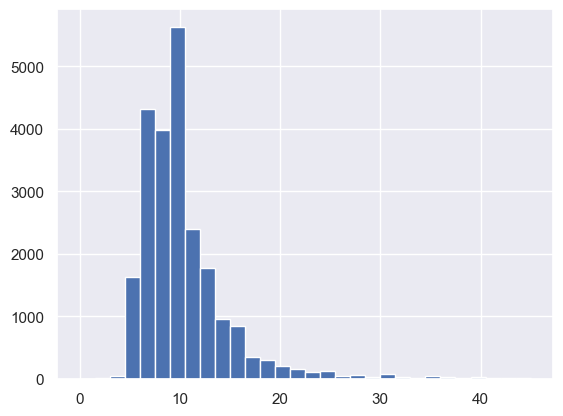

In [128]:
data["kitchen_area"].hist(bins = 30, range = (0,45))
pass

In [129]:
data.query("kitchen_area > 40")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,другой,0.320000,0.410000
497,7,5950000.0,69.0,2017-12-21,1,2.70,16,13.00,12,False,...,NaN,0,NaN,0,NaN,56.0,86231.884058,другой,0.188406,0.724638
638,10,18500000.0,131.0,2018-10-11,3,2.80,20,64.00,19,False,...,8672.0,1,139.0,0,NaN,53.0,141221.374046,другой,0.488550,0.381679
1228,6,18700000.0,122.1,2015-09-24,2,2.70,5,38.30,3,False,...,14931.0,0,NaN,0,NaN,NaN,153153.153153,другой,0.313677,0.348894
1658,20,20500000.0,168.0,2015-09-20,4,3.00,5,72.52,2,False,...,16114.0,3,574.0,2,207.0,NaN,122023.809524,другой,0.431667,0.273810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20865,0,17122148.0,178.3,2017-02-10,1,2.55,3,29.00,1,False,...,41294.0,0,NaN,0,NaN,4.0,96029.994391,первый,0.162647,0.233315
20920,15,16000000.0,93.4,2019-03-26,3,2.80,17,24.30,6,False,...,8248.0,0,NaN,2,495.0,NaN,171306.209850,другой,0.260171,0.528908
21283,20,29000000.0,193.0,2017-07-10,3,3.35,6,111.00,3,False,...,4782.0,1,674.0,0,NaN,224.0,150259.067358,другой,0.575130,0.217617
22533,19,24500000.0,155.4,2017-10-10,3,3.00,4,72.00,2,False,...,15461.0,1,756.0,2,278.0,325.0,157657.657658,другой,0.463320,0.418275


In [130]:
data.query("kitchen_area > 40").describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,77.000000,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,75.000000,75.000000,77.000000,37.000000,77.000000,40.000000,52.000000,77.000000,77.000000,77.000000
mean,12.558442,1.807748e+07,139.646753,2.948052,2.927143,8.545455,59.960000,5.909091,47.744156,0.649351,31723.866667,11293.013333,0.727273,529.837838,0.961039,369.875000,281.384615,136069.082591,0.405364,0.377484
std,6.449181,5.677541e+06,57.408012,1.024645,0.281635,5.782336,41.411085,4.820957,9.267451,1.189496,10010.910660,7856.114603,0.897898,486.049752,1.117346,239.144221,327.844185,43142.369737,0.137096,0.119011
min,0.000000,3.000000e+06,60.400000,1.000000,2.550000,2.000000,8.400000,1.000000,40.200000,0.000000,13426.000000,602.000000,0.000000,38.000000,0.000000,38.000000,4.000000,43402.777778,0.134615,0.120443
25%,7.000000,1.440000e+07,109.000000,2.000000,2.700000,5.000000,32.000000,2.000000,42.400000,0.000000,24223.500000,5118.000000,0.000000,288.000000,0.000000,211.500000,67.500000,107567.567568,0.304348,0.296026
50%,12.000000,1.785000e+07,125.600000,3.000000,2.800000,6.000000,49.700000,4.000000,45.000000,0.000000,31118.000000,9271.000000,0.000000,445.000000,1.000000,306.500000,150.000000,137500.000000,0.392913,0.366379
75%,19.000000,2.300000e+07,153.000000,3.000000,3.030000,12.000000,75.000000,7.000000,50.000000,1.000000,38652.500000,14931.000000,1.000000,620.000000,2.000000,543.750000,376.000000,161206.896552,0.486207,0.451807
max,25.000000,2.900000e+07,460.800000,6.000000,4.000000,25.000000,279.600000,24.000000,100.700000,5.000000,60195.000000,41294.000000,3.000000,2665.000000,3.000000,883.000000,1512.000000,268817.204301,0.848889,0.724638


Разброс по суммарным площадям квартир довольно большой. Присутствуют значения, для которых параметр `kitchen_to_total_ratio` кажется аномально большим (вряд ли квартира, у которой кухня занимает больше 50 процентов площади является жилой. Рассмотрим этот параметр позже.

Рассмотрим столбец `airports_nearest`:

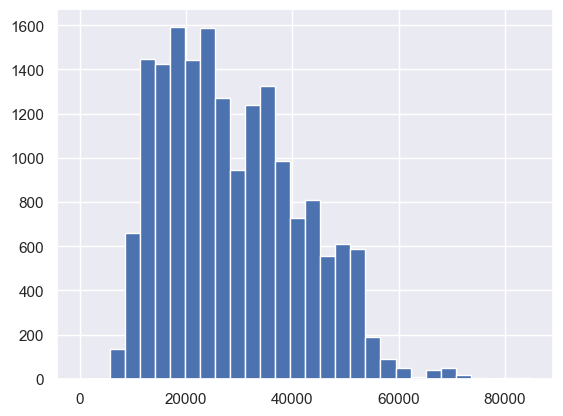

In [131]:
data["airports_nearest"].hist(bins = 30)
pass

In [135]:
data.query("airports_nearest == 0")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
20677,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,22801.0,0,NaN,0,NaN,60.0,201729.106628,другой,0.570605,0.172911


Объявление кажется станным из-за цены квадратного метра, однако эта квартира находится около Петербурга и вполне возможно, что дом, в котором она находится хороший. К тому же она довольно быстро нашла своего покупателя. Заменим расстояние до аэропорта на медианное.

In [136]:
data.loc[20677, "airports_nearest"] = data["airports_nearest"].median()

Рассмотрим `days_exposition`:

In [139]:
data.query("days_exposition < 5")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
92,3,3500000.0,29.5,2019-04-26,1,2.5,5,15.6,2,False,...,7303.0,0,NaN,0,NaN,4.0,118644.067797,другой,0.528814,0.186441
285,20,3850000.0,37.0,2018-10-14,1,2.5,16,18.2,15,False,...,11491.0,2,75.0,0,NaN,3.0,104054.054054,другой,0.491892,0.237838
358,19,12500000.0,85.0,2018-09-21,3,3.7,6,56.5,6,False,...,5777.0,2,516.0,1,36.0,4.0,147058.823529,последний,0.664706,0.258824
478,17,3140000.0,31.4,2018-12-14,1,2.5,14,16.1,6,False,...,31399.0,0,NaN,0,NaN,4.0,100000.000000,другой,0.512739,0.222930
566,13,3500000.0,38.0,2017-07-10,2,2.7,9,31.3,8,False,...,12575.0,0,NaN,0,NaN,3.0,92105.263158,другой,0.823684,0.260526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22931,3,2346000.0,34.0,2017-10-04,1,2.7,5,14.0,1,False,...,8928.0,1,406.0,1,1052.0,4.0,69000.000000,первый,0.411765,0.264706
22941,10,1600000.0,92.0,2018-07-10,3,3.0,6,13.0,1,False,...,4465.0,1,937.0,3,167.0,3.0,17391.304348,первый,0.141304,0.108696
22987,0,2500000.0,27.7,2017-09-28,0,2.7,24,18.0,4,False,...,NaN,0,NaN,0,NaN,4.0,90252.707581,другой,0.649819,0.374368
23047,11,3530000.0,36.1,2017-11-17,1,2.7,10,19.1,8,False,...,14255.0,1,163.0,2,129.0,4.0,97783.933518,другой,0.529086,0.193906


In [140]:
data.query("days_exposition < 5").describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,335.000000,3.350000e+02,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,270.000000,270.000000,335.000000,112.000000,335.000000,112.000000,335.000000,335.000000,335.000000,335.000000
mean,9.122388,4.973442e+06,51.568448,1.814925,2.682716,11.238806,28.743866,6.047761,9.642687,0.600000,27792.570370,14088.718519,0.456716,481.026786,0.507463,532.196429,3.507463,96680.499282,0.560225,0.199010
std,6.386265,2.676868e+06,20.555561,0.896643,0.178673,6.713757,12.353580,4.562682,4.367667,0.960913,12949.753897,7781.580204,0.732321,363.068590,0.840109,294.902605,0.535370,30143.679377,0.115268,0.077436
min,0.000000,9.457500e+05,14.000000,0.000000,2.500000,2.000000,10.000000,1.000000,2.000000,0.000000,7056.000000,853.000000,0.000000,20.000000,0.000000,24.000000,1.000000,17391.304348,0.141304,0.093458
25%,4.000000,3.324500e+06,37.000000,1.000000,2.550000,5.000000,18.000000,3.000000,7.000000,0.000000,15635.500000,10310.750000,0.000000,282.750000,0.000000,274.750000,3.000000,80760.633693,0.484991,0.142373
50%,9.000000,4.400000e+06,45.600000,2.000000,2.700000,9.000000,28.000000,5.000000,9.000000,0.000000,26158.500000,12814.500000,0.000000,447.000000,0.000000,501.000000,4.000000,96029.994391,0.562500,0.183908
75%,13.000000,5.842500e+06,62.300000,2.000000,2.700000,16.000000,37.050000,8.000000,10.800000,1.000000,36905.250000,16000.000000,1.000000,585.500000,1.000000,764.750000,4.000000,112114.417720,0.632741,0.237634
max,50.000000,1.980000e+07,178.300000,5.000000,3.750000,35.000000,94.100000,26.000000,41.600000,5.000000,60195.000000,52328.000000,3.000000,3064.000000,3.000000,1250.000000,4.000000,312240.000000,1.252000,0.618750


Быстрых продаж довольно много при этом условия (например - цена на квадратный метр) не кажутся выгодными. В глаза бросается маленькая общая площадь всех этих объявлений. Скорее всего эти объявления убрали потому что передумали или допустили какие-то ошибки при заполнении данных. Исключим их из рассмотрения. 

75 процентов объявлений находя покупателя спустя меньше чем 200 дней. Будем считать, что объявление,висящее больше года - аномально долгая продажа. Рассмотрим такие продажи.

In [141]:
data.query("days_exposition > 365")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
2,10,5196000.0,56.00,2015-08-20,2,2.70,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.714286,другой,0.612500,0.148214
12,20,3550000.0,42.80,2017-07-01,2,2.56,5,27.0,5,False,...,33058.0,1,294.0,3,298.0,366.0,82943.925234,последний,0.630841,0.121495
15,11,6700000.0,82.00,2017-11-23,3,3.05,5,55.6,1,False,...,10698.0,3,420.0,0,NaN,397.0,81707.317073,первый,0.678049,0.109756
16,6,4180000.0,36.00,2016-09-09,1,2.70,17,16.5,7,False,...,14616.0,0,NaN,1,859.0,571.0,116111.111111,другой,0.458333,0.305556
22,11,2950000.0,32.00,2016-10-29,1,2.60,9,17.7,9,False,...,14211.0,2,517.0,1,190.0,615.0,92187.500000,последний,0.553125,0.190625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23214,5,3000000.0,30.80,2016-06-08,1,2.70,5,16.1,3,False,...,14193.0,2,258.0,0,NaN,808.0,97402.597403,другой,0.522727,0.204545
23217,8,3550000.0,39.50,2016-10-03,1,2.70,16,19.0,13,False,...,14951.0,0,NaN,0,NaN,721.0,89873.417722,другой,0.481013,0.215190
23233,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,4489.0,0,NaN,1,806.0,519.0,129903.978052,другой,0.552812,0.145405
23234,2,1350000.0,30.00,2017-07-07,1,2.55,5,17.5,4,False,...,NaN,0,NaN,0,NaN,413.0,45000.000000,другой,0.583333,0.200000


In [142]:
data.query("days_exposition > 365").describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,2969.000000,2.969000e+03,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2321.000000,2322.000000,2969.000000,1109.000000,2969.000000,1258.000000,2969.000000,2969.000000,2969.000000,2969.000000
mean,9.105760,6.476350e+06,64.793789,2.219939,2.730498,10.227012,36.919776,5.633210,10.997996,0.538565,28393.660491,13445.170543,0.531492,496.462579,0.690805,485.320350,614.489054,97134.205996,0.564281,0.186149
std,5.463022,4.712998e+06,33.719639,1.142681,0.239322,6.482846,21.848664,4.820343,5.663757,0.931956,12092.526935,9291.045928,0.798690,369.171371,0.960851,281.006499,236.941002,36097.032823,0.118811,0.077921
min,0.000000,7.400000e+05,13.000000,0.000000,2.400000,1.000000,9.000000,1.000000,4.000000,0.000000,6949.000000,392.000000,0.000000,7.000000,0.000000,16.000000,365.000000,12542.372881,0.126087,0.031299
25%,5.000000,3.500000e+06,42.000000,1.000000,2.560000,5.000000,20.000000,2.000000,8.000000,0.000000,19466.000000,6524.500000,0.000000,284.000000,0.000000,259.250000,433.000000,75221.238938,0.490000,0.130000
50%,9.000000,4.990000e+06,56.600000,2.000000,2.700000,9.000000,31.300000,4.000000,9.900000,0.000000,25680.000000,12210.500000,0.000000,447.000000,0.000000,453.000000,541.000000,93548.387097,0.568000,0.167820
75%,13.000000,7.769900e+06,77.600000,3.000000,2.750000,14.000000,45.300000,7.000000,12.200000,1.000000,36371.000000,16134.000000,1.000000,613.000000,1.000000,686.000000,725.000000,113684.210526,0.642557,0.232493
max,24.000000,2.999900e+07,363.000000,16.000000,4.500000,35.000000,225.900000,27.000000,70.000000,5.000000,84869.000000,65968.000000,3.000000,2888.000000,3.000000,1341.000000,1580.000000,331962.500000,2.407692,0.761538


Продажи могли настолько затянуться из-за того, что дом, в котором находится квартиры имеет неудобное расположение или слишком старый или квартира в довольно плохом состоянии. Цена за квадратный метр у них не кажется слишком высокой нормальная, к тому же таких объявлений довольно много. Эти данные вполне можно оставить. 

In [143]:
data = data.query("days_exposition > 5")
data = data.reset_index(drop = True)

Рассмотрим параметр `square_meter_price`:

In [152]:
data.query("square_meter_price < 20000")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
135,6,800000.0,40.3,2018-06-25,2,2.55,3,29.0,1,False,...,NaN,0,NaN,0,NaN,81.0,19851.116625,первый,0.719603,0.203474
139,7,1400000.0,73.5,2018-03-31,3,2.60,5,46.0,5,False,...,NaN,0,NaN,0,NaN,276.0,19047.619048,последний,0.625850,0.108844
400,19,1300000.0,65.4,2018-11-04,3,2.50,5,49.3,2,False,...,NaN,0,NaN,0,NaN,45.0,19877.675841,другой,0.753823,0.077982
1286,9,1050000.0,54.0,2018-09-20,2,2.55,5,30.0,5,False,...,NaN,0,NaN,0,NaN,166.0,19444.444444,последний,0.555556,0.157407
1462,11,999000.0,62.0,2018-02-15,4,2.55,5,46.0,2,False,...,NaN,0,NaN,0,NaN,226.0,16112.903226,другой,0.741935,0.112903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18714,0,740000.0,59.0,2015-07-18,2,2.55,3,38.0,3,False,...,NaN,0,NaN,0,NaN,847.0,12542.372881,последний,0.644068,0.144068
18719,9,1400000.0,75.0,2017-07-11,3,2.50,5,45.0,1,False,...,NaN,0,NaN,0,NaN,86.0,18666.666667,первый,0.600000,0.106667
18940,10,1100000.0,62.0,2017-12-09,3,2.55,2,29.0,2,False,...,NaN,0,NaN,0,NaN,45.0,17741.935484,последний,0.467742,0.132258
18965,9,980000.0,54.0,2017-12-09,2,2.55,1,29.0,1,False,...,NaN,0,NaN,0,NaN,45.0,18148.148148,первый,0.537037,0.151852


In [150]:
data.query("square_meter_price < 20000").describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,77.000000,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,3.000000,3.000000,77.000000,1.0,77.000000,1.0,77.000000,77.000000,77.000000,77.000000
mean,9.129870,1.016701e+06,62.272727,2.597403,2.573377,4.363636,36.719481,2.649351,7.936364,0.311688,24161.000000,4539.666667,0.012987,350.0,0.025974,653.0,148.701299,16560.268258,0.611808,0.134280
std,4.702605,3.644165e+05,23.189946,0.711924,0.102465,1.692935,11.107821,1.668329,1.735535,0.612582,1386.441849,616.858439,0.113961,NaN,0.227921,NaN,156.749806,2348.629555,0.130040,0.032322
min,0.000000,7.100000e+05,38.000000,1.000000,2.500000,1.000000,12.500000,1.000000,5.100000,0.000000,22592.000000,4069.000000,0.000000,350.0,0.000000,653.0,7.000000,10507.246377,0.160256,0.068421
25%,6.000000,8.000000e+05,50.300000,2.000000,2.550000,3.000000,29.000000,1.000000,6.500000,0.000000,23631.000000,4190.500000,0.000000,350.0,0.000000,653.0,45.000000,15000.000000,0.576923,0.108974
50%,9.000000,9.500000e+05,58.900000,3.000000,2.550000,5.000000,32.400000,2.000000,8.200000,0.000000,24670.000000,4312.000000,0.000000,350.0,0.000000,653.0,87.000000,16666.666667,0.635135,0.132258
75%,11.000000,1.050000e+06,66.600000,3.000000,2.550000,5.000000,43.000000,4.000000,8.500000,0.000000,24945.500000,4775.000000,0.000000,350.0,0.000000,653.0,192.000000,18571.428571,0.681818,0.155172
max,20.000000,3.200000e+06,190.000000,5.000000,3.000000,9.000000,90.700000,9.000000,13.700000,2.000000,25221.000000,5238.000000,1.000000,350.0,2.000000,653.0,847.000000,19957.983193,0.859281,0.215789


Совсем близких к нулю значений (меньше 10000 за квадратный метр) нет. Такая маленькая цена за квадратный метр объясняется тем, что почти все это объявления находятся в маленьких поселках, где, из-за отсутствия спроса, недвижимость стоит гораздно меньше.

In [157]:
data.query("square_meter_price > 300000")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
1046,5,17860000.0,55.00,2016-03-15,2,2.70,7,31.30,5,False,...,4984.0,3,335.0,0,NaN,128.0,324727.272727,другой,0.569091,0.180000
2820,7,26000000.0,83.00,2017-11-10,3,3.00,5,54.00,1,False,...,8902.0,1,675.0,0,NaN,22.0,313253.012048,первый,0.650602,0.144578
3884,11,16000000.0,45.00,2018-07-14,2,2.70,8,29.00,4,False,...,4324.0,1,634.0,3,458.0,102.0,355555.555556,другой,0.644444,0.155556
4372,12,23417400.0,75.50,2017-10-13,1,2.70,8,31.30,4,False,...,5297.0,0,NaN,2,198.0,111.0,310164.238411,другой,0.414570,0.131126
5801,7,24821600.0,81.70,2017-12-16,2,2.70,7,31.30,3,False,...,6042.0,3,362.0,3,246.0,90.0,303813.953488,другой,0.383109,0.121175
7242,6,14948000.0,42.70,2017-09-15,2,2.80,4,27.50,4,False,...,3914.0,1,290.0,1,860.0,167.0,350070.257611,последний,0.644028,0.086651
8038,9,19500000.0,49.70,2017-06-08,1,3.80,10,31.30,8,False,...,4624.0,1,2218.0,2,99.0,90.0,392354.124748,другой,0.629779,0.199195
12250,1,12000000.0,31.00,2018-01-05,1,2.70,4,31.30,1,False,...,1500.0,3,304.0,3,33.0,90.0,387096.774194,первый,1.009677,0.319355
12495,9,23000000.0,71.00,2017-05-15,2,3.30,4,31.00,2,False,...,51115.0,0,NaN,0,NaN,90.0,323943.661972,другой,0.436620,0.345070
15753,13,22000000.0,71.60,2017-09-26,2,3.00,8,35.20,4,False,...,9439.0,1,619.0,3,720.0,161.0,307262.569832,другой,0.491620,0.250000


In [155]:
data.query("square_meter_price > 300000").describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,16.000000,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,15.000000,16.000000,11.000000,16.000000,11.000000,16.000000,16.000000,16.000000,16.000000
mean,9.312500,2.184743e+07,64.995000,1.875000,2.908125,8.062500,33.327500,4.187500,13.621250,0.562500,29323.266667,8724.000000,1.250000,593.454545,1.687500,402.818182,121.312500,349965.099498,0.539925,0.211222
std,5.735489,4.898213e+06,19.485232,0.619139,0.300870,3.991136,9.693664,2.903303,7.550154,0.813941,13643.313713,11949.098591,1.183216,580.389587,1.352467,315.598738,89.540098,82430.706457,0.165759,0.093287
min,1.000000,1.200000e+07,31.000000,1.000000,2.700000,4.000000,16.830000,1.000000,3.700000,0.000000,11018.000000,1500.000000,0.000000,134.000000,0.000000,33.000000,15.000000,303460.207612,0.312500,0.086651
25%,5.750000,1.834000e+07,48.525000,1.750000,2.700000,5.750000,30.500000,2.750000,9.900000,0.000000,24031.500000,4536.000000,0.000000,297.000000,0.000000,149.500000,90.000000,308065.642458,0.431107,0.152811
50%,8.000000,2.320870e+07,71.300000,2.000000,2.765000,7.500000,31.300000,4.000000,10.300000,0.000000,25476.000000,5297.000000,1.000000,362.000000,2.000000,246.000000,96.000000,324335.467350,0.536981,0.185549
75%,12.250000,2.511620e+07,80.425000,2.000000,3.000000,10.000000,32.275000,4.250000,16.475000,1.000000,32649.500000,7472.000000,2.250000,654.500000,3.000000,726.500000,136.250000,351441.582097,0.633341,0.257673
max,20.000000,2.980000e+07,97.000000,3.000000,3.800000,20.000000,55.900000,13.000000,35.000000,2.000000,70016.000000,51115.000000,3.000000,2218.000000,3.000000,860.000000,370.000000,640422.350472,1.009677,0.437500


Большинство из этих объявлений находятся около Петербурга. Общая площадь квартир довольно мала и расстояние от центра велико. При этом минимальное количество этажей - 4. Вряд ли это элитные особняки или коттеджи. В то же время, количество дней, спустя которое объявление было убрано, вполне нормально. Вероятно, эти дома находятся недалеко от какой-то достопримечательности или иного места, которое может так сильно повышать цену на квадратный метр. Уберем их, чтобы они не испортили статистику.

In [158]:
data = data.query("square_meter_price < 300000")
data = data.reset_index(drop = True)

Изучим параметр `living_to_total_ratio` и `kitchen_to_total_ratio`:

In [163]:
data.query("living_to_total_ratio < 0.25 or kitchen_to_total_ratio > 0.5")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
302,14,21000000.0,96.00,2017-02-07,2,3.00,7,20.000,1,False,...,2391.0,0,NaN,3,418.0,153.0,218750.000000,первый,0.208333,0.375000
370,6,7950000.0,51.60,2017-11-10,1,2.70,10,12.700,10,False,...,7508.0,1,287.0,1,670.0,98.0,154069.767442,последний,0.246124,0.447674
419,7,5950000.0,69.00,2017-12-21,1,2.70,16,13.000,12,False,...,NaN,0,NaN,0,NaN,56.0,86231.884058,другой,0.188406,0.724638
505,15,4100000.0,43.00,2017-06-30,1,2.75,18,10.000,12,False,...,NaN,0,NaN,0,NaN,18.0,95348.837209,другой,0.232558,0.465116
553,14,7200000.0,43.00,2017-10-31,1,2.70,8,9.000,2,False,...,5232.0,1,2137.0,1,933.0,296.0,167441.860465,другой,0.209302,0.534884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18828,16,20338132.0,132.65,2018-02-13,4,3.30,5,31.300,1,False,...,16465.0,1,1205.0,2,97.0,308.0,153321.764041,первый,0.235959,0.140219
18941,6,21600000.0,141.00,2016-12-22,2,3.00,11,31.300,11,False,...,4836.0,0,NaN,3,153.0,479.0,153191.489362,последний,0.221986,0.092199
19020,10,6552700.0,83.58,2018-02-20,3,2.73,21,18.000,5,False,...,NaN,0,NaN,0,NaN,428.0,78400.335008,другой,0.215363,0.121441
19253,12,4800000.0,37.00,2016-02-24,1,2.70,14,8.000,11,False,...,12387.0,2,358.0,1,950.0,139.0,129729.729730,другой,0.216216,0.594595


In [164]:
data.query("living_to_total_ratio < 0.25 or kitchen_to_total_ratio > 0.5").describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,155.000000,1.550000e+02,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,117.000000,118.000000,155.000000,58.000000,155.000000,70.000000,155.000000,155.000000,155.000000,155.000000
mean,9.800000,9.267238e+06,86.732903,2.354839,2.802323,11.561290,22.007065,6.574194,18.198194,0.503226,30838.153846,12110.584746,0.554839,461.448276,0.800000,447.400000,230.161290,112286.036531,0.398417,0.342425
std,5.979836,7.302114e+06,59.025160,1.602522,0.260546,7.375885,9.241087,6.075230,11.547293,0.976172,12540.946572,10960.178328,0.806966,307.072263,1.065394,325.155856,293.937852,48475.274771,0.423423,0.241676
min,0.000000,8.500000e+05,12.000000,0.000000,2.500000,2.000000,6.500000,1.000000,6.000000,0.000000,9258.000000,602.000000,0.000000,18.000000,0.000000,27.000000,7.000000,10897.435897,0.089330,0.035652
25%,5.000000,3.750000e+06,42.150000,1.000000,2.700000,5.000000,13.735000,2.000000,9.900000,0.000000,22634.000000,4531.750000,0.000000,324.000000,0.000000,160.750000,45.000000,79741.025641,0.208500,0.092752
50%,9.000000,6.350000e+06,73.000000,2.000000,2.700000,9.000000,19.700000,4.000000,12.000000,0.000000,26619.000000,9062.500000,0.000000,432.000000,0.000000,405.000000,98.000000,106730.769231,0.240000,0.388889
75%,14.500000,1.335000e+07,133.500000,3.000000,2.800000,18.000000,31.300000,11.000000,23.260000,1.000000,37310.000000,15539.250000,1.000000,547.250000,1.000000,640.750000,313.500000,139985.754986,0.359868,0.542710
max,24.000000,2.980000e+07,263.800000,9.000000,3.950000,27.000000,45.000000,26.000000,64.000000,5.000000,67850.000000,52895.000000,3.000000,2137.000000,3.000000,1293.000000,1489.000000,292307.692308,2.407692,0.825000


Отношение жилой площади к общей кажется слишком маленькой, учитывая то, что общая площадь нормальная. Вполне возможно, что это не жилые дома и их лучше убрать из рассмотрения, поскольку цена на них может подчиняться совсем не тем правилам что и на жилую недвижимость.

In [169]:
data.query("living_to_total_ratio > 1")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,floor_type,living_to_total_ratio,kitchen_to_total_ratio
259,6,2000000.0,25.0,2017-02-07,1,2.55,5,30.0,5,False,...,NaN,0,NaN,0,NaN,45.0,80000.000000,последний,1.200000,0.320000
446,0,6000001.0,25.0,2018-11-16,1,3.00,5,31.3,5,False,...,3871.0,1,207.0,1,776.0,17.0,240000.040000,последний,1.252000,0.396000
496,2,1850000.0,25.0,2019-02-20,0,2.63,10,28.2,7,False,...,NaN,0,NaN,0,NaN,29.0,74000.000000,другой,1.128000,0.432000
699,7,3200000.0,31.0,2018-08-10,1,2.70,5,31.3,2,False,...,12655.0,1,463.0,0,NaN,45.0,103225.806452,другой,1.009677,0.319355
925,12,3490000.0,29.0,2017-10-21,1,2.50,9,31.3,6,False,...,18226.0,0,NaN,0,NaN,280.0,120344.827586,другой,1.079310,0.341379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17881,11,2540000.0,23.0,2018-03-22,1,2.70,5,31.3,1,False,...,7997.0,0,NaN,1,698.0,45.0,110434.782609,первый,1.360870,0.430435
18788,14,3350000.0,27.0,2018-11-03,1,2.70,16,31.3,6,False,...,9551.0,0,NaN,0,NaN,35.0,124074.074074,другой,1.159259,0.148148
19189,12,4090000.0,30.8,2018-09-09,1,2.50,9,31.3,7,False,...,11145.0,0,NaN,0,NaN,172.0,132792.207792,другой,1.016234,0.259740
19335,7,2850000.0,29.0,2018-02-11,1,2.70,9,31.3,9,False,...,12051.0,0,NaN,0,NaN,45.0,98275.862069,последний,1.079310,0.341379


In [170]:
data.query("living_to_total_ratio > 1").describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,79.00000,7.900000e+01,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,65.000000,65.000000,79.000000,26.000000,79.000000,35.000000,79.000000,79.000000,79.000000,79.000000
mean,6.78481,2.844371e+06,27.391899,0.911392,2.647848,9.430380,30.873418,5.582278,9.311392,0.151899,26698.246154,13096.507692,0.493671,427.884615,0.582278,530.085714,74.253165,103487.101021,1.145063,0.344854
std,4.67034,1.053593e+06,3.413259,0.285992,0.143032,6.334042,0.873647,4.973281,1.268048,0.482743,12813.846833,5465.982251,0.830098,363.415171,0.761368,289.867046,84.670170,37423.545177,0.151275,0.061714
min,0.00000,8.500000e+05,18.000000,0.000000,2.500000,2.000000,28.200000,1.000000,4.000000,0.000000,7472.000000,1715.000000,0.000000,11.000000,0.000000,63.000000,8.000000,30357.142857,1.003205,0.148148
25%,3.50000,2.175000e+06,25.000000,1.000000,2.550000,5.000000,31.300000,2.000000,9.900000,0.000000,16286.000000,9869.000000,0.000000,211.000000,0.000000,271.000000,36.000000,86320.590286,1.029616,0.319355
50%,7.00000,2.950000e+06,28.000000,1.000000,2.700000,8.000000,31.300000,4.000000,9.900000,0.000000,24043.000000,12147.000000,0.000000,375.000000,0.000000,584.000000,45.000000,102933.333333,1.079310,0.337884
75%,10.00000,3.350000e+06,30.280000,1.000000,2.700000,11.000000,31.300000,7.000000,9.900000,0.000000,36106.000000,16047.000000,1.000000,565.750000,1.000000,755.000000,57.000000,118245.689655,1.248266,0.389676
max,20.00000,6.900000e+06,31.200000,1.000000,3.330000,35.000000,31.300000,26.000000,10.800000,2.000000,61908.000000,34085.000000,3.000000,1798.000000,3.000000,1020.000000,467.000000,276000.000000,1.633333,0.495000


Уберем эти данные, поскольку такие нереальные значения могут испортить анализ. Они, скорее всего, вызваны неправильным заполнением, поскольку почти все из них имеют маленькую площадь. Таких объкутов довольно мало, поэтому при их удалении нет риска убрать слишком много квартир малой площади.

In [171]:
data = data.query("living_to_total_ratio > 0.25")
data = data.query("kitchen_to_total_ratio < 0.5")
data = data.query("living_to_total_ratio < 1")
data = data.reset_index(drop = True)

Посмотрим как изменились характеристики данных полсе преобразования:

In [172]:
data[columns].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_to_total_ratio,kitchen_to_total_ratio
count,19421.000000,1.942100e+04,19421.000000,19421.000000,19421.000000,19421.000000,19421.000000,19421.000000,19421.000000,19421.000000,14984.000000,15002.000000,19421.000000,6474.000000,19421.000000,7409.000000,19421.000000,19421.000000,19421.000000,19421.000000
mean,9.599300,5.524251e+06,57.083495,2.006230,2.690660,10.902425,32.509152,6.001545,10.100166,0.595026,28897.606781,14475.140515,0.452448,493.965863,0.576850,524.035632,184.099789,95116.837373,0.564789,0.191041
std,5.610576,3.675734e+06,26.514366,1.000058,0.198152,6.634445,17.287452,4.957865,4.558061,0.949873,12786.941675,8549.239945,0.731354,345.629629,0.866488,275.899776,219.011575,32395.229794,0.111243,0.072010
min,0.000000,7.100000e+05,17.000000,0.000000,2.200000,1.000000,8.900000,1.000000,2.000000,0.000000,6450.000000,208.000000,0.000000,1.000000,0.000000,13.000000,6.000000,10507.246377,0.250400,0.025381
25%,6.000000,3.400000e+06,39.900000,1.000000,2.550000,5.000000,18.700000,2.000000,7.200000,0.000000,18440.250000,9767.000000,0.000000,288.000000,0.000000,308.000000,45.000000,76233.183857,0.489011,0.136364
50%,9.000000,4.500000e+06,50.700000,2.000000,2.700000,9.000000,30.000000,4.000000,9.400000,0.000000,26875.500000,13268.000000,0.000000,456.000000,0.000000,509.000000,99.000000,93582.887701,0.565495,0.176955
75%,13.000000,6.400000e+06,67.000000,3.000000,2.700000,16.000000,40.000000,8.000000,11.000000,1.000000,37434.000000,16472.000000,1.000000,616.750000,1.000000,733.000000,235.000000,111111.111111,0.639269,0.236842
max,50.000000,2.999900e+07,460.800000,16.000000,4.800000,36.000000,279.600000,33.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,299000.000000,0.994282,0.498558


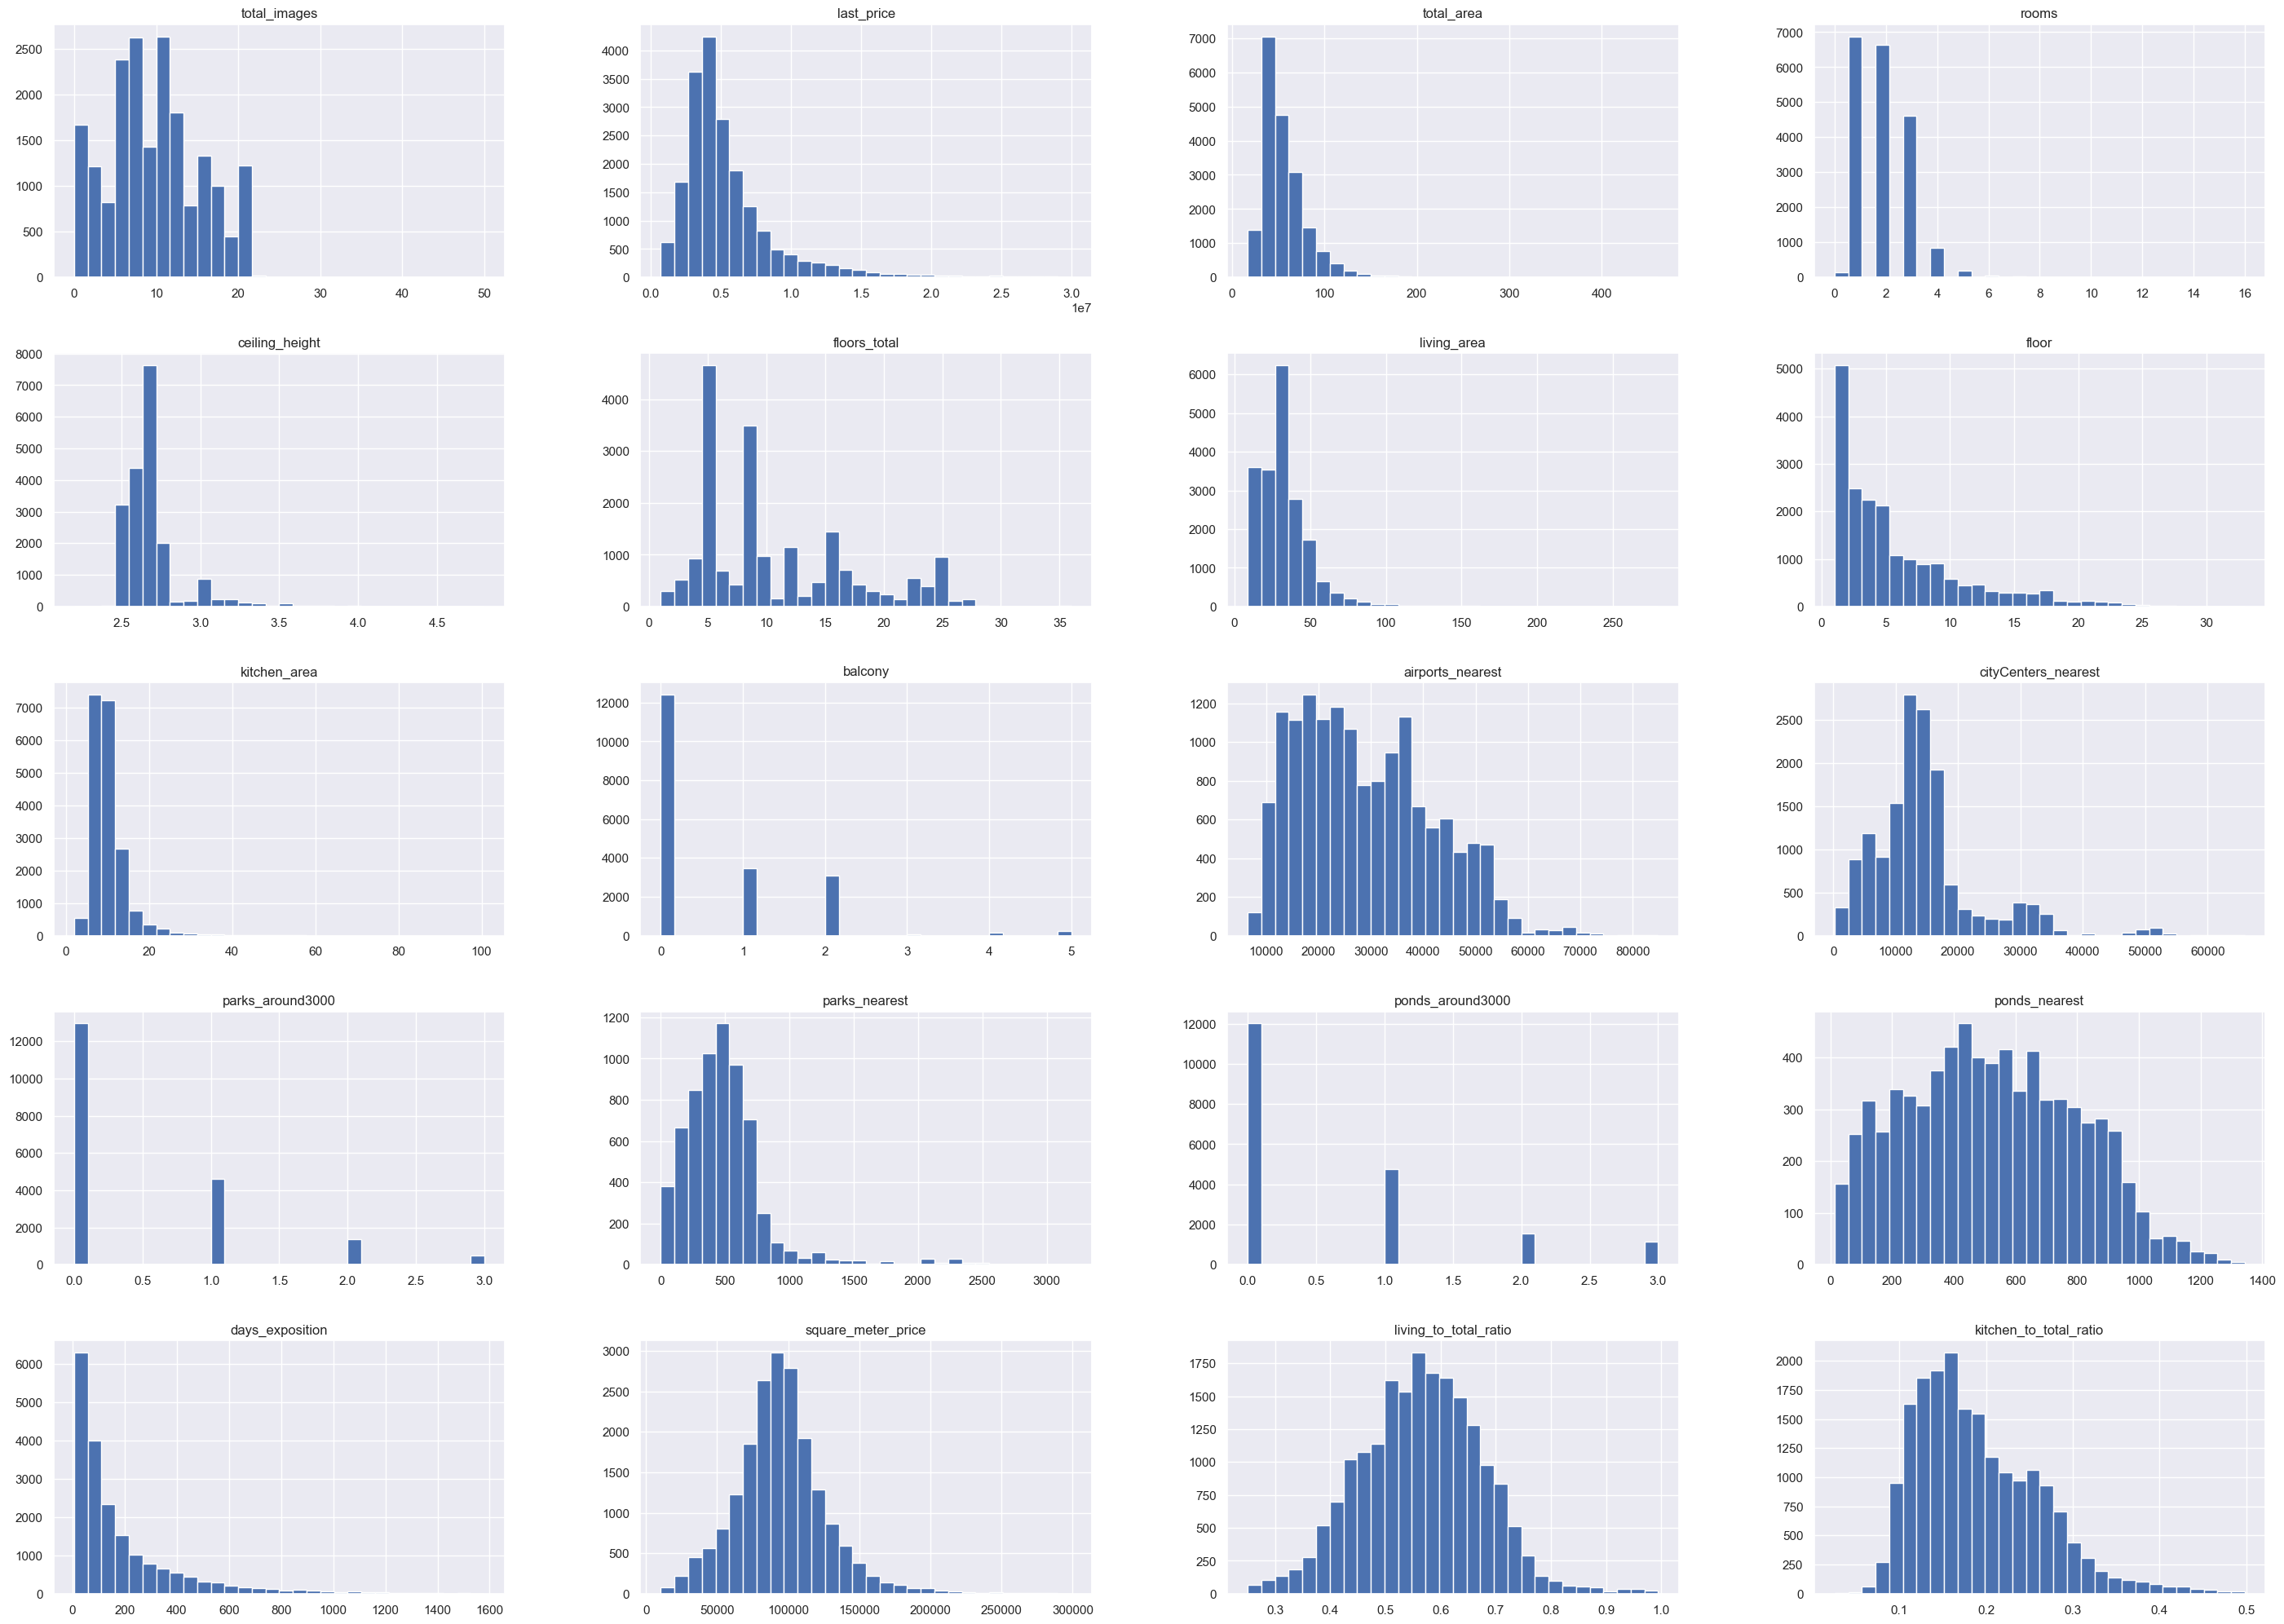

In [173]:
data[columns].hist(figsize = (35,25), bins = 30)
pass

Данные стали чище от выбросов и аномальных значений при этом распределения не поменяли вид. Данных для исследования осталось достаточно много.

### Изучение влияния различных параметров на цену квартиры

Для начала рассмотрим матрицу корреляции.

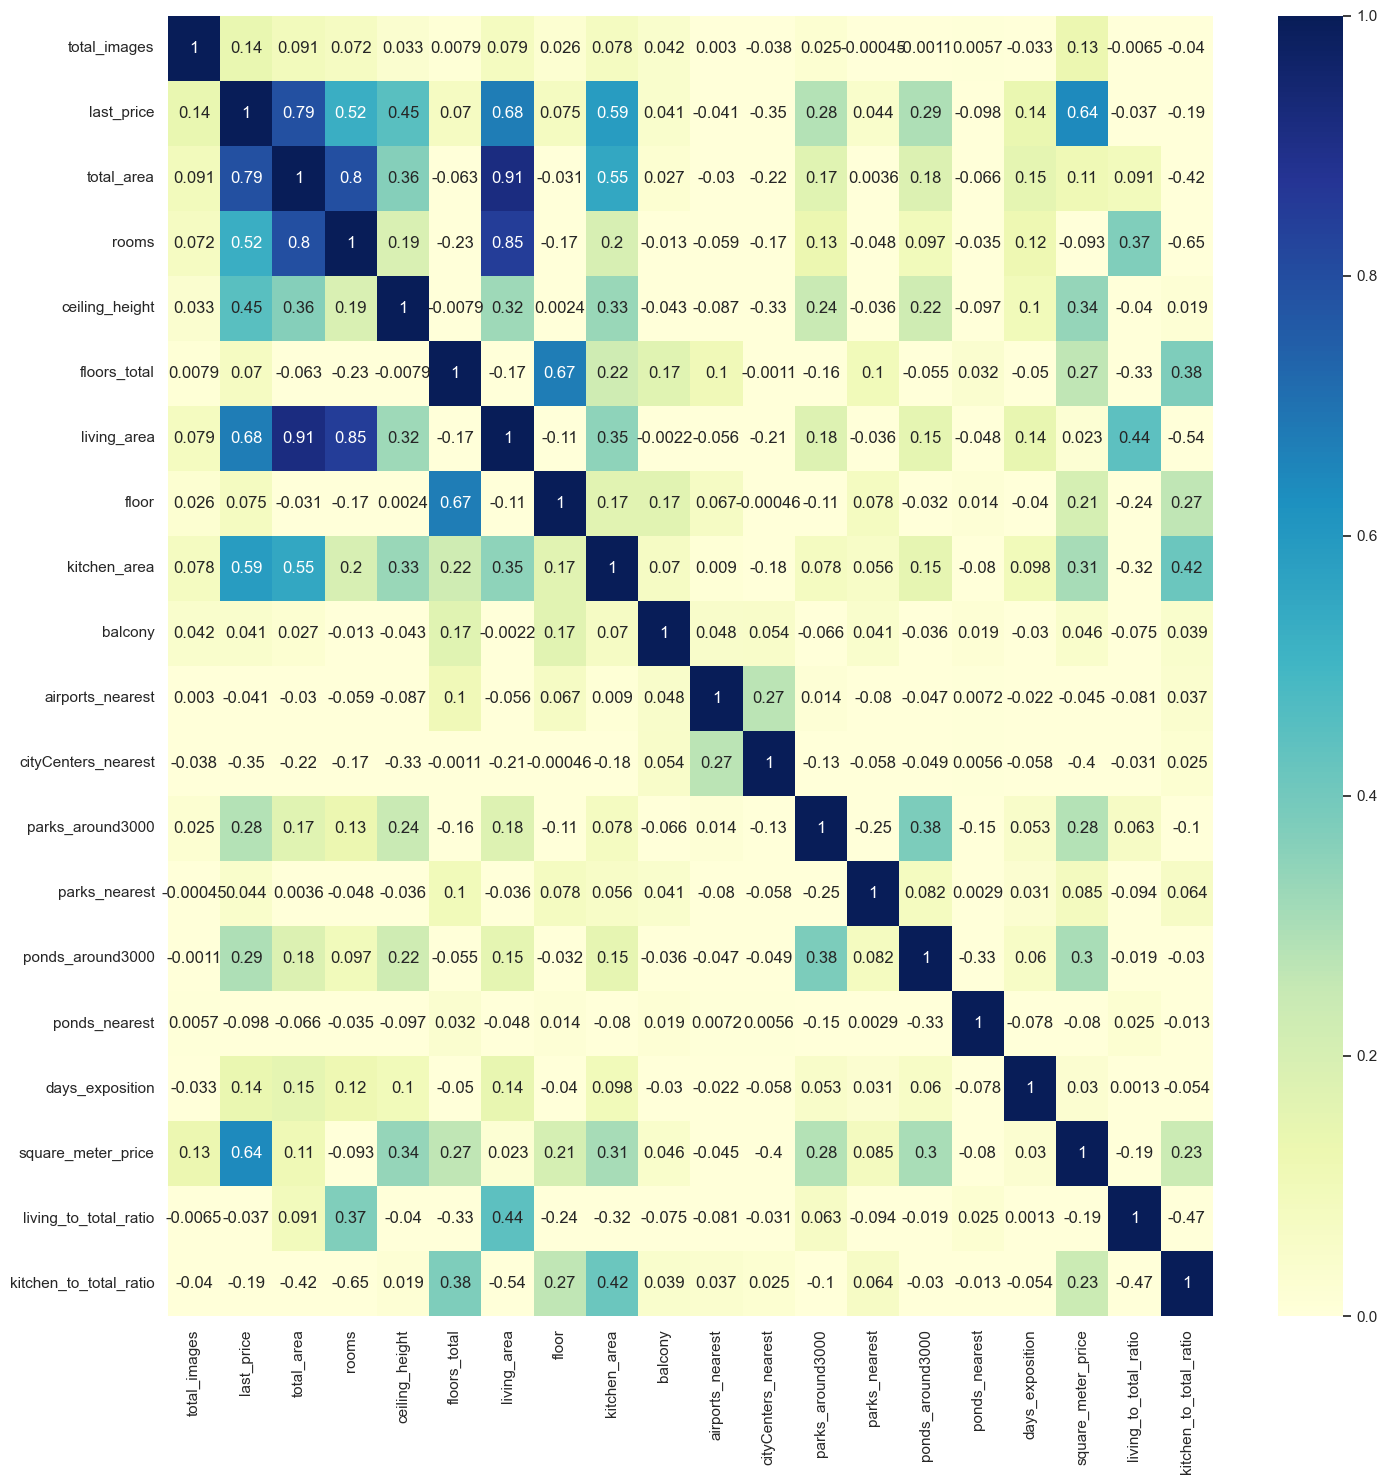

In [183]:
fig = plt.figure(layout = "tight", figsize = (15,15))
ax = fig.add_subplot(111)
sns.heatmap((data[columns]).corr(), cmap = "YlGnBu", annot = True, vmin = 0, vmax = 1, ax = ax)
pass

Исходя их матрицы корреляции видно, что цена на квартиру хорошо коррелирует с параметрами: `total_area`, `rooms`, `ceiling_height`, `living_area`, `kitchen_area` и `square_meter_price`. Параметры `living_area`, `kitchen_area`, `square_meter_price` можно убрать из рассмотрения, поскольку цена на квадратный метр рассчитывалась исходя из цены на квартиру, а жилая площадь и площадь кухни вполне возможно зависят через общую площадь.

Рассмотрим более подробно зависимость цены от площади. Для этого построим график. Поскольку цена также сильно зависит от расположения выделим 5 крупнейших городов и построим график для них и для остальных:

In [283]:
big_localitys = data["locality_name"].value_counts().index.to_list()[:6]
data["is_big"] = data["locality_name"].apply(lambda x: x if x in big_localitys else "маленькое поселение")

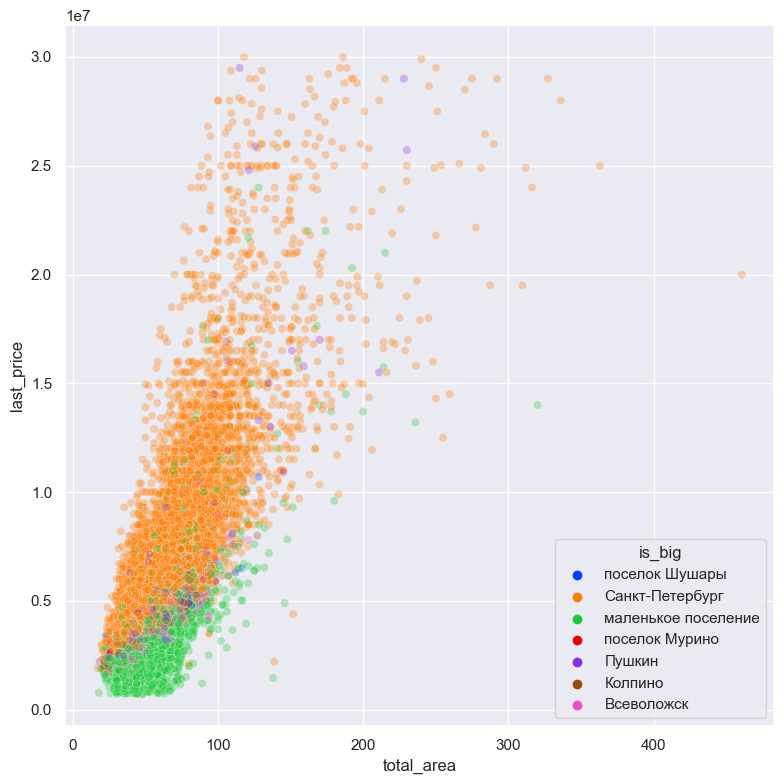

In [284]:
fig = plt.figure(layout = "tight", figsize = (8,8))
ax = fig.add_subplot(111)
sns.scatterplot(data = data, x = "total_area", y = "last_price", alpha = 0.3, hue = "is_big", palette = "bright", ax = ax)
pass

Видно, что для Петербурга стоимость квартир в среднем выше, чем для других городов и поселков. Действительно, чем больше площадь, тем больше объявлений с высокой ценой. Для того, чтобы убедиться в этом попробуем использовать дополнительную информацию из данных, возможно, помимо города, надо учитывать расстояние до центра, ведь это также является важным ценообразующим фактором. Учет такого большого количество факторов на одном графике сильно понижает его информативность, поэтому поступим иначе. Рассмотрим зависимость цены от суммарной площади для квартир с примерно одинаковым расстоянием до центра, логично предположить, что на примерно одном расстоянии могу быть примерно похожие по году постройки дома.

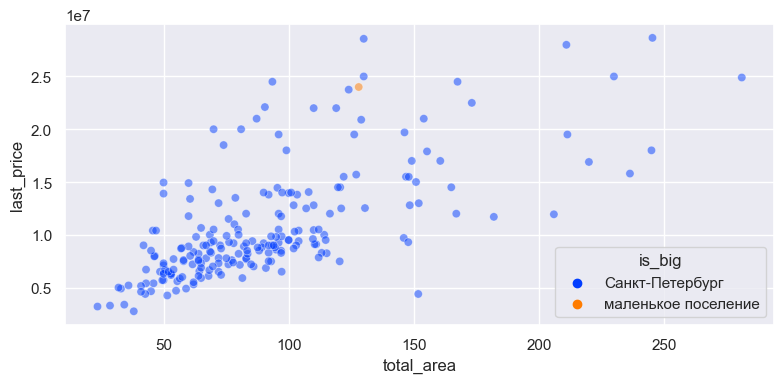

In [285]:
data_to_plot = data.query("1500 < cityCenters_nearest < 2500")
fig = plt.figure(layout = "tight", figsize = (8,4))
ax = fig.add_subplot(111)
sns.scatterplot(data = data_to_plot, x = "total_area", y = "last_price", alpha = 0.5, hue = "is_big", palette = "bright", ax = ax)
pass

Зависимость становится немного более ярко выраженой, однако для области с высокой ценой и размерами зависимость все ещё имеет очень большой разброс.

Довольно хорошо зависимость проявляет себя в области до 60-70 квадратных метров. Дальнейший раброс можно объяснить тем, что не учтено множество других факторов, формирующих стоимость дома (например, благоприятность района или год постройки дома). Рассмотри какой процент квартир имеет суммарную площадь меньше 70 квадратных метров, поскольку в этой области цену по площади предсказать проще всего.

In [286]:
data.query("total_area < 70")["floor"].count()/data.count()["floor"]

0.774934349415581

Видно, что достаточно большое количесвто реальных случаев входит в указанную выше область, поэтому использовать в качестве одного из параметров общую площадь квартиры кажется разумным.

Попробуем ещё немного улучшить эту зависимость и возьмём дома с примерно одинаковым количеством этажей в доме и количеством комнат. Построим несколько графиков для различных величин.

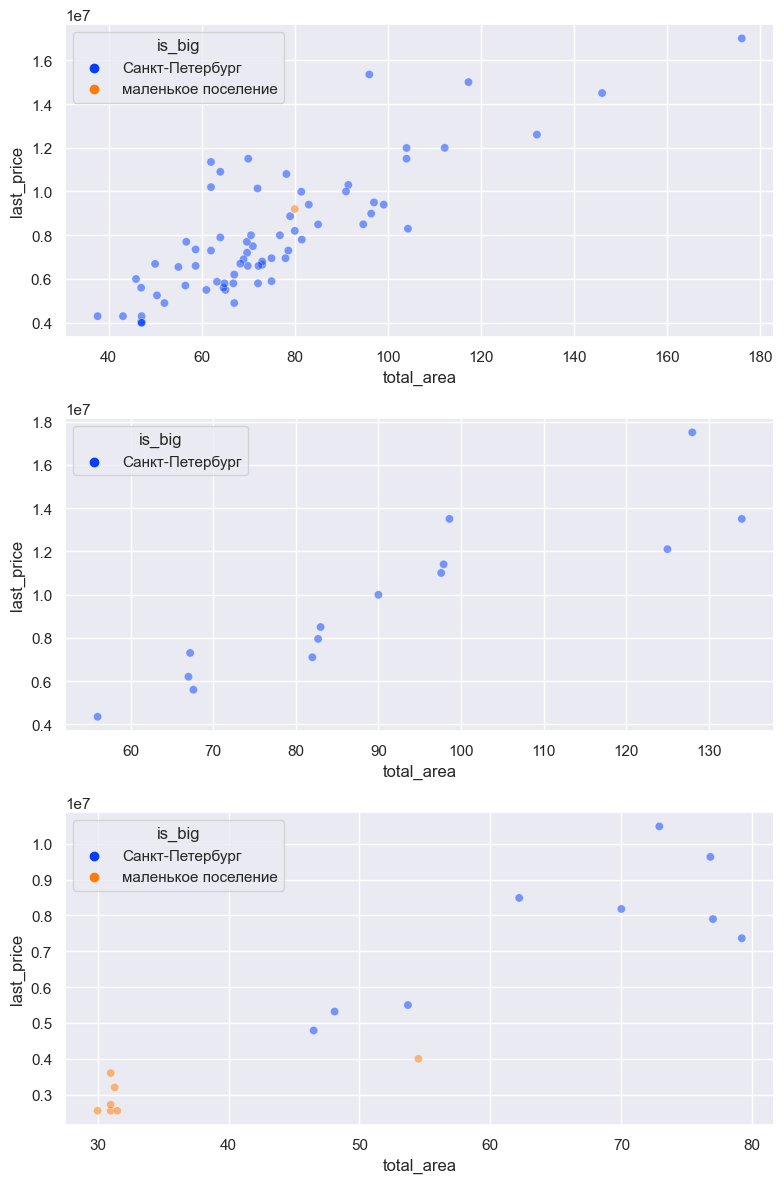

In [287]:
data_to_plot = data.query("3000 < cityCenters_nearest < 4000 and 2 <= rooms <= 3 and 2 < floors_total < 5")
fig = plt.figure(layout = "tight", figsize = (8,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
sns.scatterplot(data = data_to_plot, x = "total_area", y = "last_price", alpha = 0.5, hue = "is_big", palette = "bright", ax = ax1)
data_to_plot = data.query("10000 < cityCenters_nearest < 15000 and 3 <= rooms <= 4 and 5 < floors_total < 7")
sns.scatterplot(data = data_to_plot, x = "total_area", y = "last_price", alpha = 0.5, hue = "is_big", palette = "bright", ax = ax2)
data_to_plot = data.query("20000 < cityCenters_nearest < 23000 and 1 <= rooms <= 2 and 1 <= floors_total <= 3")
sns.scatterplot(data = data_to_plot, x = "total_area", y = "last_price", alpha = 0.5, hue = "is_big", palette = "bright", ax = ax3)
pass

Разброс в области больштх значений стал меньше, теперь с большей уверенностью можно сказать, что цена зависит от суммарной площади, причем почти линейно, однако также стало понятно, что необходимо использовать дополнительные данные.

Один из факторов, который может сильно влиять на стоимость квартиры - расстояние до центра ближайшего города (даже несмотря на то, что эти величины плохо коррелируют между собой). Посмотрим зависит ли цена от этого параметра. Будем рассматривать зависимость цены квадратного метра от расстояния, чтобы не привязываться к конкретной площади.

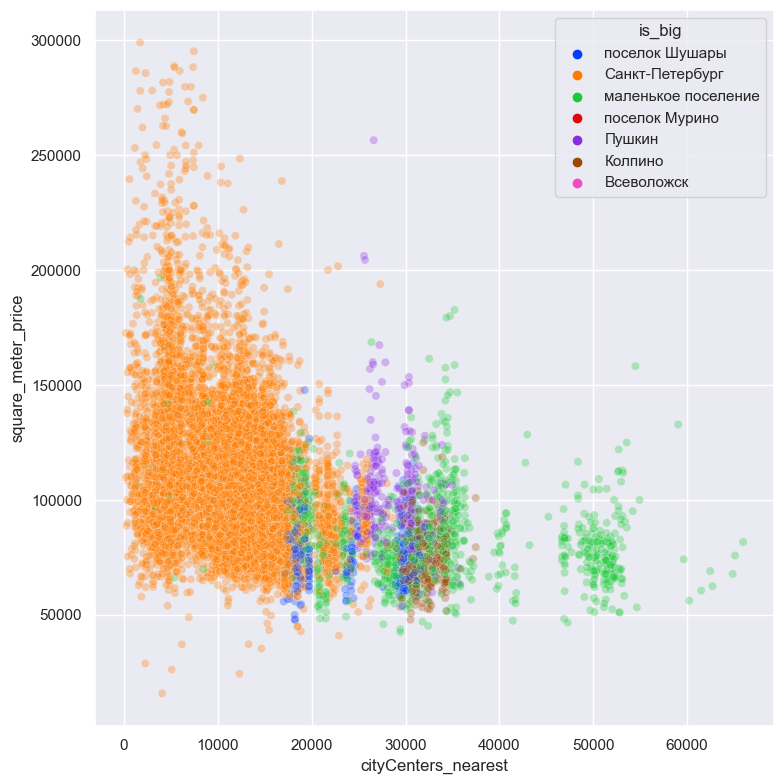

In [288]:
fig = plt.figure(layout = "tight", figsize = (8,8))
ax = fig.add_subplot(111)
sns.scatterplot(data = data, x = "cityCenters_nearest", y = "square_meter_price", alpha = 0.3, hue = "is_big", palette = "bright", ax = ax)
pass

Очевидно, что зависимости нет. Для одного и того же значения расстояния до центра есть как очень большие, так и очень маленькие значения цены. Причём зависимости нет ни для каких поселений. Однако, видно, что до определенного значения расстояния до центра есть довольно много дорогих квартир, это можно попробовать использовать далее.

Рассмотрим зависимость цены на квадратный метр от количества комнат.

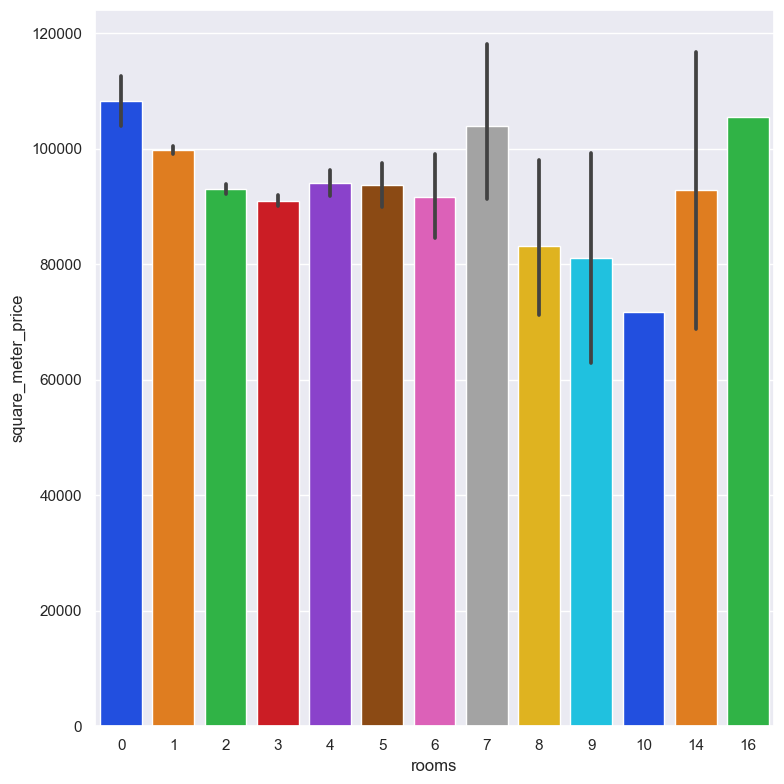

In [289]:
fig = plt.figure(layout = "tight", figsize = (8,8))
ax = fig.add_subplot(111)
sns.barplot(data = data, x = "rooms", y = "square_meter_price", palette = "bright", ax = ax)
pass

Какой-либо явной зависимости не видно. Возможно это влияние того, что цена квадратного метра в различных поселениях отличается. Посмотрим тот же график для какого-либо конкретного поселения.

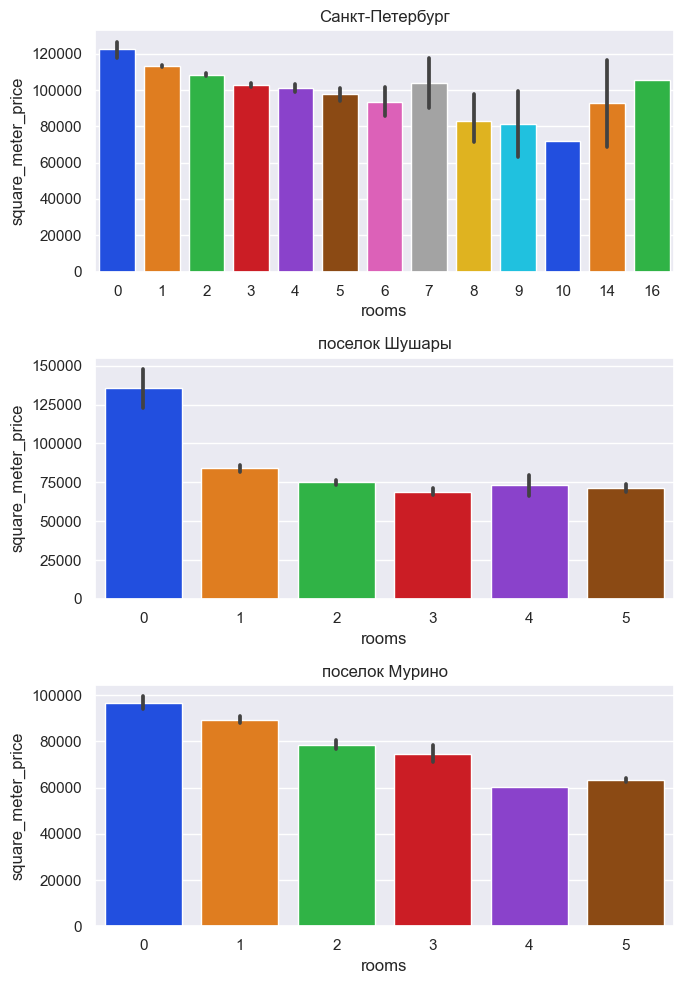

In [290]:
fig = plt.figure(layout = "tight", figsize = (7,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
data_to_plot = data.query("locality_name == 'Санкт-Петербург'")
sns.barplot(data = data_to_plot, x = "rooms", y = "square_meter_price", palette = "bright", ax = ax1)
ax1.set_title('Санкт-Петербург')
data_to_plot = data.query("locality_name == 'поселок Шушары'")
sns.barplot(data = data_to_plot, x = "rooms", y = "square_meter_price", palette = "bright", ax = ax2)
ax2.set_title('поселок Шушары')
data_to_plot = data.query("locality_name == 'поселок Мурино'")
sns.barplot(data = data_to_plot, x = "rooms", y = "square_meter_price", palette = "bright", ax = ax3)
ax3.set_title('поселок Мурино')
pass

За исключением нескольких мест, чем больше комнат - тем меньше цена на квадратный метр. Особенно хорошо это выполняется для меньше чем 5 комнат. Поскольку от меньше чем 5 комнатные квартиры наиболее распространены, количество комнат можно использовать в качестве одного из параетров для определения цены квартиры.

Рассмотрим зависимость стоимости от высоты потолков. Поскольку у старых домов потолки обычно выше, это может косвенно давать информацию о годе постройки дома и влиять на его стоимость.

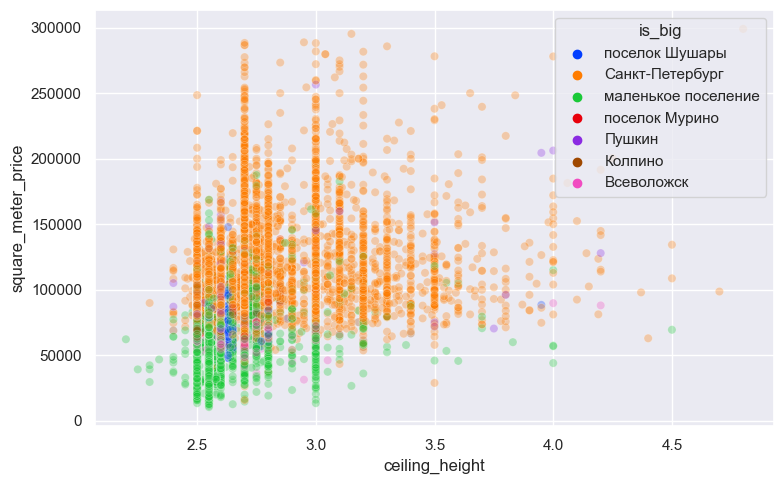

In [298]:
fig = plt.figure(layout = "tight", figsize = (8,5))
ax = fig.add_subplot(111)
sns.scatterplot(data = data, x = "ceiling_height", y = "square_meter_price", alpha = 0.3, hue = "is_big", palette = "bright", ax = ax)
pass

Какой-либо явной зависимости нет.

Посмотрим, зависит ли стоимость от того, расположен дом на первом этаже, последнем или другом.

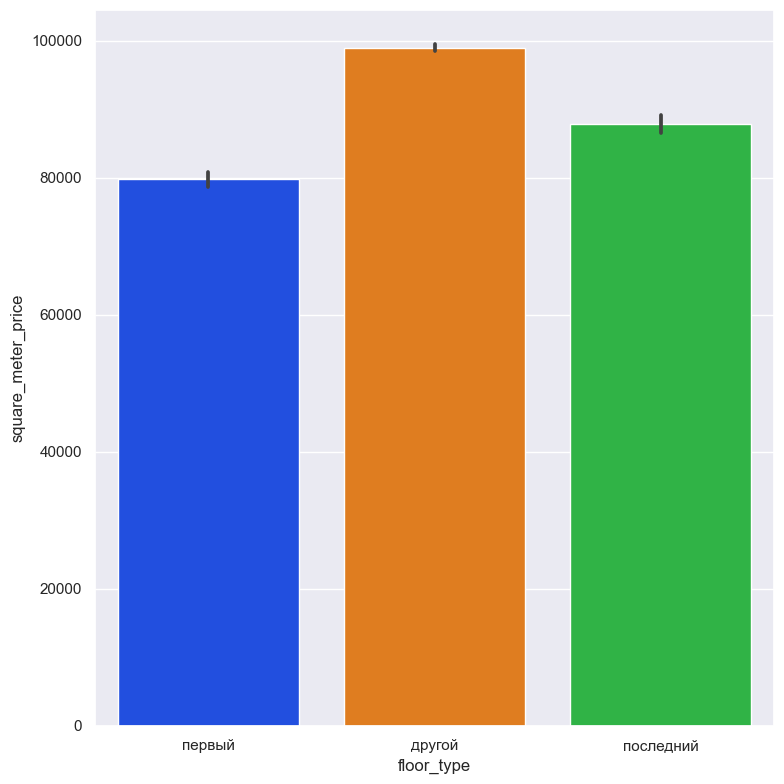

In [303]:
fig = plt.figure(layout = "tight", figsize = (8,8))
ax = fig.add_subplot(111)
sns.barplot(data = data, x = "floor_type", y = "square_meter_price", palette = "bright", ax = ax)
pass

Видно, что первый этаж имеет наименьший спрос, как и ожидалось. Последний этаж также имеет меньший спрос в сравнении с другими этажами, ведь там может протекать крыша зимой и летом он греется сильнее, чем другие. Этот параметр может помочь при предсказании итоговой стоимости квартиры.

Изучим зависимость цены от даты размещения.

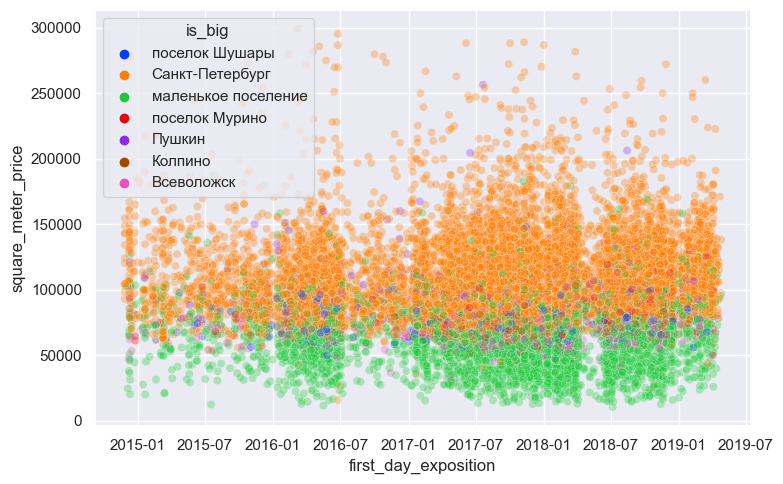

In [304]:
fig = plt.figure(layout = "tight", figsize = (8,5))
ax = fig.add_subplot(111)
sns.scatterplot(data = data, x = "first_day_exposition", y = "square_meter_price", alpha = 0.3, hue = "is_big", palette = "bright", ax = ax)
pass

Не видно явного повышения или понижения цены за 5 лет. В глаза бросаются периоды, в которые выставлялось наименьшее количество объявлений. Рассмотри зависимость от времени более подробно.

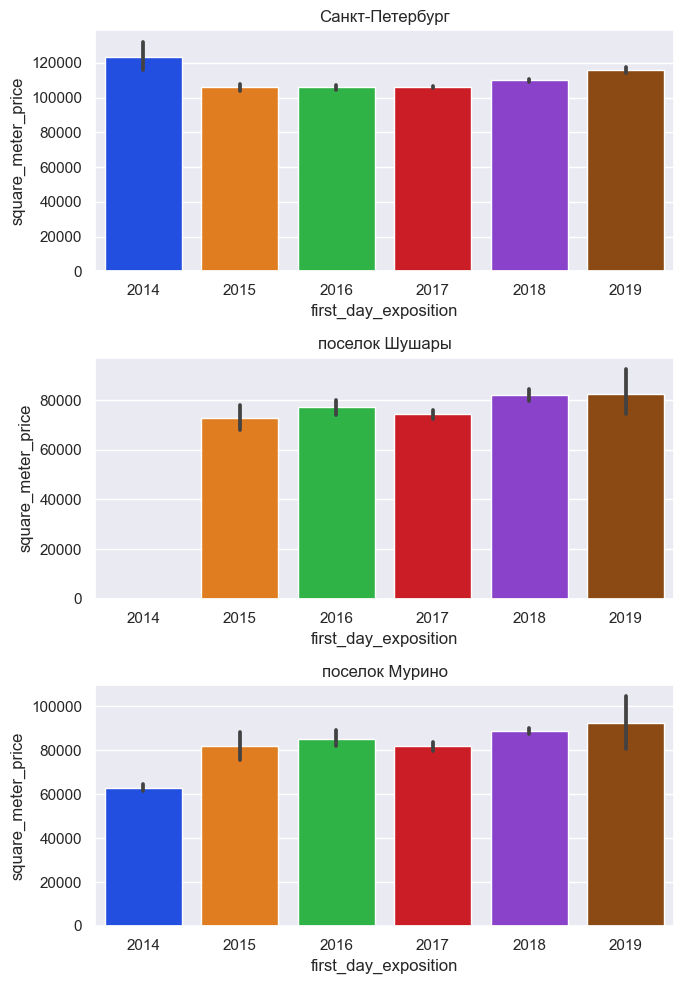

In [324]:
fig = plt.figure(layout = "tight", figsize = (7,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
data_to_plot = data.query("locality_name == 'Санкт-Петербург'")
sns.barplot(data = data_to_plot, x = data["first_day_exposition"].apply(lambda x: x.year), y = "square_meter_price", palette = "bright", ax = ax1)
ax1.set_title('Санкт-Петербург')
data_to_plot = data.query("locality_name == 'поселок Шушары'")
sns.barplot(data = data_to_plot, x = data["first_day_exposition"].apply(lambda x: x.year), y = "square_meter_price", palette = "bright", ax = ax2)
ax2.set_title('поселок Шушары')
data_to_plot = data.query("locality_name == 'поселок Мурино'")
sns.barplot(data = data_to_plot, x = data["first_day_exposition"].apply(lambda x: x.year), y = "square_meter_price", palette = "bright", ax = ax3)
ax3.set_title('поселок Мурино')
pass

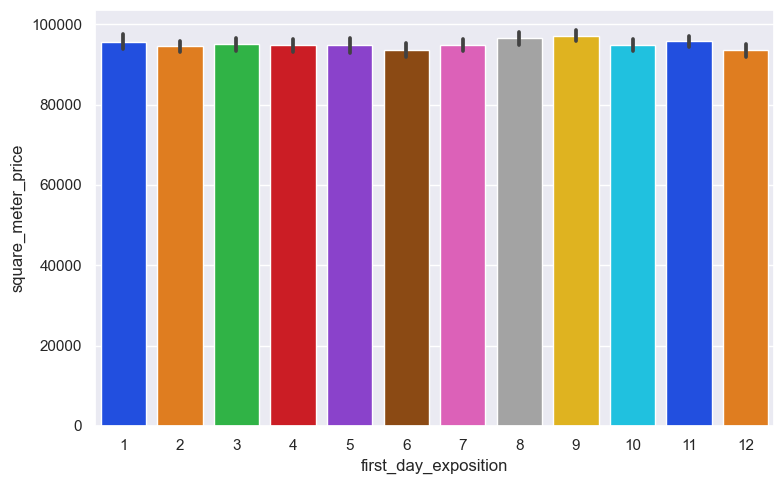

In [319]:
fig = plt.figure(layout = "tight", figsize = (8,5))
ax = fig.add_subplot(111)
sns.barplot(data = data, x = data["first_day_exposition"].apply(lambda x: x.month), y = "square_meter_price", palette = "bright", ax = ax)
pass

Цена квадратного метра никак не зависит от месяца. Во всех поселках цена немного увеличивется в зависмотсти от года. В 2017 году видно небольшой спад.

Выделим 10 населенных пунктов с наибольшим количеством объявлений и отсортируем их по цене квадратного метра.

In [340]:
big_10 = data["locality_name"].value_counts().index.to_list()[:11]
data_top_10 = data.query("locality_name in @big_10")
square_meter_info = data_top_10.pivot_table(index = "locality_name", values = "square_meter_price").sort_values(by = "square_meter_price", ascending = False)
square_meter_info

,square_meter_price
locality_name,
Санкт-Петербург,108091.004975
Пушкин,101675.991598
деревня Кудрово,92392.723325
поселок Парголово,89924.480865
поселок Мурино,85631.120502
Петергоф,83267.186375
поселок Шушары,77980.950999
Колпино,74745.038785
Гатчина,68127.008399


Самым дорогим городом оказался Санкт-Петербург. Можно сделать вывод, что поселок, в котором расположена квартира может сильно влиять на цену.

### Дополнительное исследование для Санкт-Петербурга

Выделим квартиры, находящиеся в центре города и провведем похожее исследование. Определим, будет ли отличаться резултат для центра Петербурга от общей базы.

Для начала определим, где находится центр города.

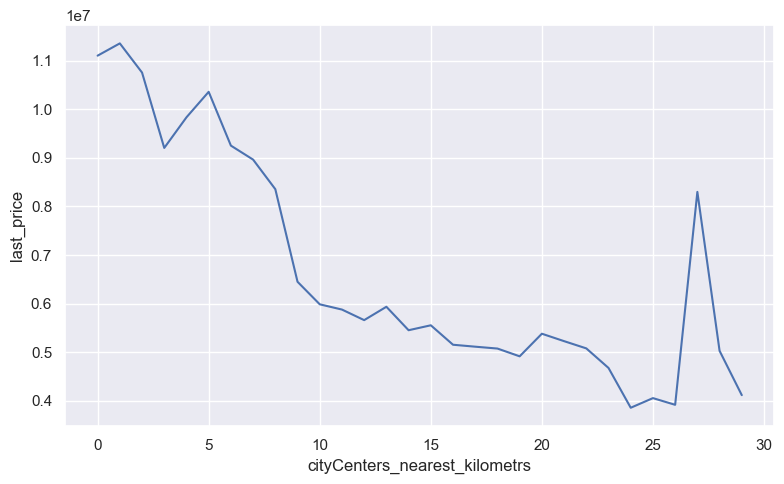

In [353]:
data_spb = data.query("locality_name == 'Санкт-Петербург'")
data_spb = data_spb.dropna(subset = "cityCenters_nearest")
data_spb["cityCenters_nearest_kilometrs"] = (data_spb["cityCenters_nearest"]/1000).round()
data_mean_price_per_kilometr = data_spb.pivot_table(index = "cityCenters_nearest_kilometrs", values = "last_price" )
fig = plt.figure(layout = "tight", figsize = (8,5))
ax = fig.add_subplot(111)
sns.lineplot(data = data_mean_price_per_kilometr, x = data_mean_price_per_kilometr.index, y = "last_price")
pass

График средней цены квартиры для километра сильно меняется в районе 8-9 километров, поэтому, будем считать, что центральная зона имеет размер 9 километров.

In [355]:
data_spb_center = data_spb.query("cityCenters_nearest_kilometrs < 9")
data_spb_out_off_center = data_spb.query("cityCenters_nearest_kilometrs >= 9")

Сравним некоторые параметры для центра с параметрами вне центра.

In [366]:
print("Внутри центра:")
print()
print(data_spb_center[["total_area", "last_price", "rooms", "ceiling_height"]].mean().astype(int))
print()
print("Вне центра:")
print()
print(data_spb_out_off_center[["total_area", "last_price", "rooms", "ceiling_height"]].mean().astype(int))

Внутри центра:

total_area             78
last_price        9635057
rooms                   2
ceiling_height          2
dtype: int64

Вне центра:

total_area             54
last_price        5575914
rooms                   1
ceiling_height          2
dtype: int64


Общая площадь и цена внути ценрта превосходит те же параметры вне центра. Количество комнат и высота потолков почти одинаковые.

Рассмотрим факторы, которые влияют на цену квартир в центре так же, как и для общей базы.

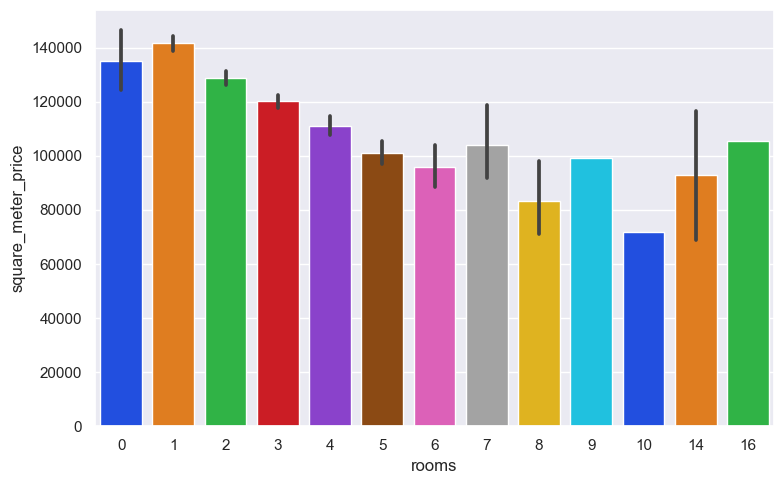

In [371]:
fig = plt.figure(layout = "tight", figsize = (8,5))
ax = fig.add_subplot(111)
sns.barplot(data = data_spb_center, x = "rooms", y = "square_meter_price", palette = "bright", ax = ax)
pass

Можно заметить, что цены на студии в центре меньше, чем на однокомнатные квартиры, чего не было для общих данных. Это можно объяснить тем, что таких квартир там довольно мало, поэтому значение цены на студии имеет довольно большой разброс. В остальном зависимость похожа.

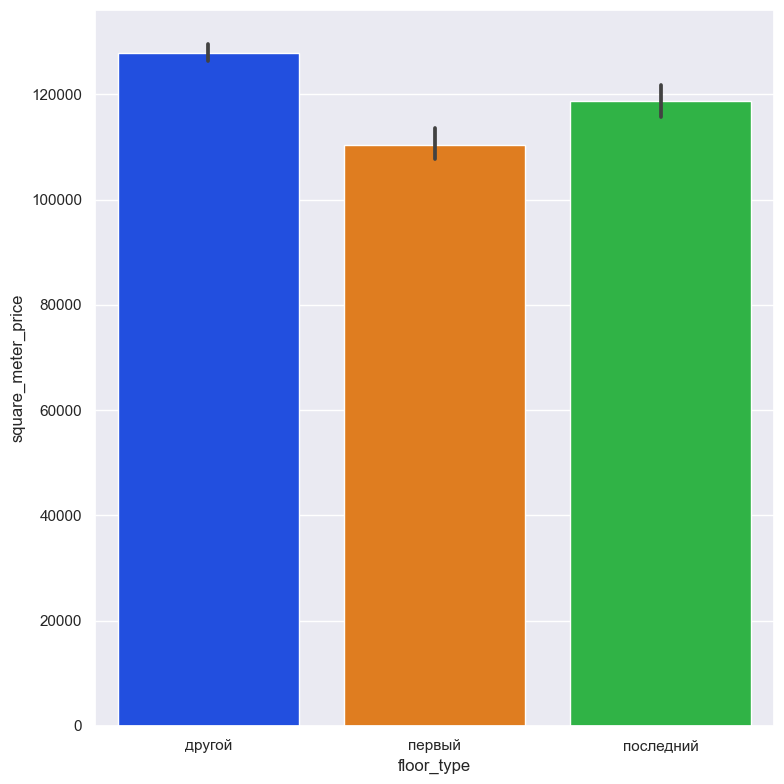

In [372]:
fig = plt.figure(layout = "tight", figsize = (8,8))
ax = fig.add_subplot(111)
sns.barplot(data = data_spb_center, x = "floor_type", y = "square_meter_price", palette = "bright", ax = ax)
pass

Так же, как и для общих данных, цена на первый и последний этажи в среднем ниже.

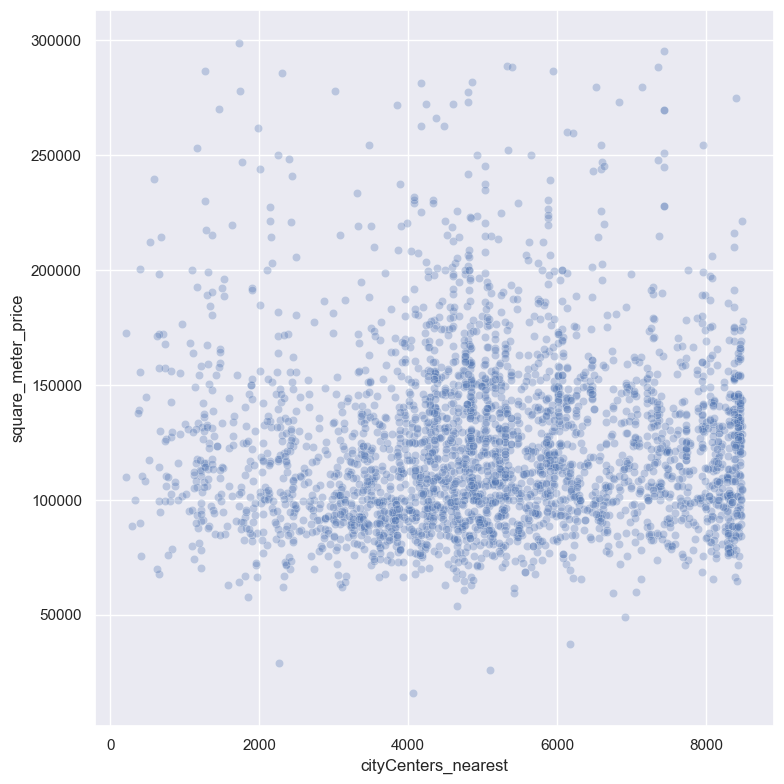

In [373]:
fig = plt.figure(layout = "tight", figsize = (8,8))
ax = fig.add_subplot(111)
sns.scatterplot(data = data_spb_center, x = "cityCenters_nearest", y = "square_meter_price", alpha = 0.3, ax = ax)
pass

Цена за квадратный метр, так же, как и для общих данных, не зависит от расстояния до центра.

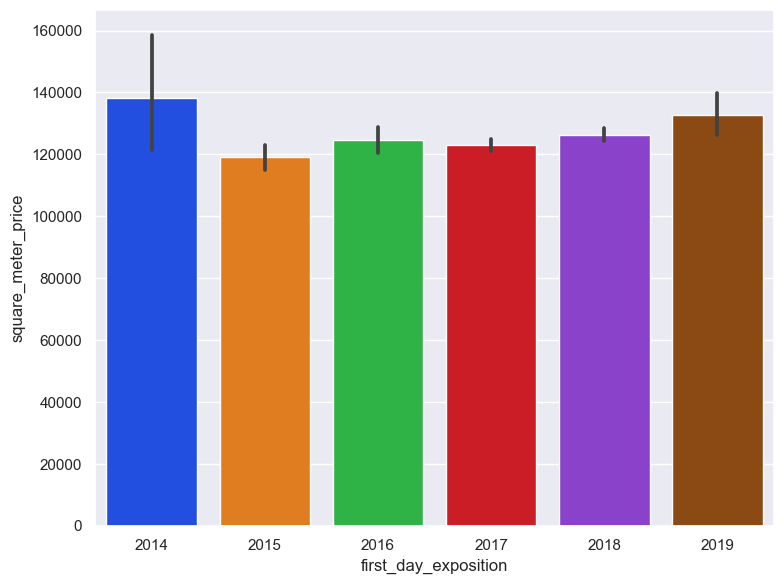

In [378]:
fig = plt.figure(layout = "tight", figsize = (8,6))
ax = fig.add_subplot(111)
sns.barplot(data = data_spb_center, x = data_spb_center["first_day_exposition"].apply(lambda x: x.year), y = "square_meter_price", palette = "bright", ax = ax)
pass

Также, как и для общих данных, цена немного растет с течением времени.

Можно сделать вывод, что зависимоти цены для центра схожи с зависимостями для общего набора данных, однако средняя цена на квартиры внутри центра выше, чем вне центра.

## Общий вывод

В результате исследования стоимости недвижимости в Санкт-Петербурге было выявлено, что наибольшим образом на цену влияют следующие параметры: 


1) Общая площадь. Особенно хорошо эта зависимоть проявляется для квартир с общим размером меньше 70 квадратных метров. В этой области зависимость напоминает линейную.
2) Количество комнат. Если рассматривать квартиры до 5 комнат, то чем больше комнат, тем меньше средняя цена на квадратный метр.
3) Этаж. Кватры на первом и последнем этаже пользуются меньшим спросом, поэтому цена на них в среднем сильно меньше, чем на квартры на других этажах.
4) Время продажи. Квартиы немного дорожают с каждым годом, этот факт можно учесть в дальнейшей работе.
5) Расположение. В различных населенных пунктах средняя цена за квадратный метр может сильно отличаться.
6) Расстояние до центра города. Из этого парамтера можно выделить центра Санкт-Петербурга, где стоимость квартир в среднем выше.


Был отдельно исследован центр Санкт-Петербурга. Стоимость недвижимости в центре в среднем больше, чем вне. Однако, все зависимости для него остались такими же, как и для общих данных.


